1) Exploracion de datos
1.1) Se puede decir que este dataset está “sucio” ya que pueden haber datos erróneos o faltantes. Imprima en pantalla un fragmento aleatorio del dataset e indique qué columnas sería útil modificar y de qué manera. Es útil explorar un resumen con los estadísticos básicos y les recordamos que pueden existir valores faltantes (expresados como NaNs).

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

RANDOM_STATE = 95

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

file_name = os.path.join(cwd, '..', 'data', 'raw', 'casas_dev.csv')
# Load the dataset
df = pd.read_csv(file_name)

import sys
sys.path.append(os.path.join(cwd, '..', 'src'))
# from utils import convert_sqft_to_m2, normalize_df, plot_pairplot
from data_splitting import train_val_split, cross_val
from models import LinearRegression
from metrics import MSE,MAE,RMSE,R2
from preprocessing import handle_missing_values, normalize, one_hot_encoder, min_max_normalize
from utils import pretty_print_df

# Mostrar un fragmento aleatorio de 10 filas
print("\nMuestra aleatoria de 10 filas:")
print(df.sample(10))

# Mostrar estadísticas básicas
print("\nEstadísticas básicas:")
print(df.describe())

# Mostrar información sobre valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Comentarios sobre las columnas a modificar:
print("\nColumnas que sería útil modificar:")
print("- rooms: Hay valores faltantes que deberían imputarse")
print("- age: Hay valores faltantes que deberían imputarse") 
print("- area_units: Hay dos unidades diferentes (m2 y sqft) que deberían unificarse")
print("- area: Debería convertirse todo a la misma unidad")



Current working directory: c:\Users\mmatt\workspace\facultad\tercero\ML\ML\tp1\notebooks

Muestra aleatoria de 10 filas:
       area area_units  is_house  has_pool   age   price        lat  \
161   431.0       sqft         0         0   6.0   314.0  40.698021   
616  1173.0       sqft         0         0  13.0   805.0  40.698022   
337    82.0         m2         0         1   NaN   171.0 -34.609510   
668  1324.0       sqft         1         1  10.0  1262.0  40.699617   
879   936.0       sqft         0         0   6.0   690.0  40.712557   
485   114.0         m2         1         0   9.0   222.0 -34.621694   
307  1012.0       sqft         0         0   9.0   689.0  40.720028   
657   872.0       sqft         1         0  14.0   747.0  40.709548   
832   657.0       sqft         0         0   6.0   451.0  40.719245   
687   114.0         m2         0         0   4.0   196.0 -34.640648   

           lon  rooms  
161 -74.006514    1.0  
616 -74.015122    3.0  
337 -58.388027    2.0  
6

In [60]:
# Convertir todas las áreas a metros cuadrados (m2)
# columnas del dataset: area,area_units,is_house,has_pool,age,price,lat,lon,rooms
# 1 sqft = 0.092903 m2
df = pd.read_csv('../data/raw/casas_dev.csv')

for index, row in df.iterrows():
    if row['area_units'] == 'sqft':
        df.at[index, 'area'] = row['area'] * 0.092903
    else:
        df.at[index, 'area'] = row['area']

# Eliminar las columnas originales de área que ya no necesitamos
df = df.drop(columns=['area_units'])

# Imputar valores faltantes

df = handle_missing_values(df)

# Para rooms: usar la mediana según el área
# df['rooms'] = df['rooms'].fillna(df.groupby(pd.qcut(df['area'], 5))['rooms'].transform('median'))

# Para age: usar la mediana general
# df['age'] = df['age'].fillna(df['age'].median())

# Verificar que no queden valores nulos
print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())

# Guardar el dataset procesado
df.to_csv('../data/processed/casas_dev_processed.csv', index=False)
print("\nDataset procesado guardado en data/processed/casas_dev_processed.csv")

# Mostrar las primeras filas del dataset procesado
print("\nPrimeras filas del dataset procesado:")
print(df.head())



Valores faltantes después de la limpieza:
area        0
is_house    0
has_pool    0
age         0
price       0
lat         0
lon         0
rooms       0
dtype: int64

Dataset procesado guardado en data/processed/casas_dev_processed.csv

Primeras filas del dataset procesado:
         area  is_house  has_pool   age  price        lat        lon  rooms
0   58.993405         1         0  18.0  546.0  40.679064 -74.007844    2.0
1  102.007494         0         0   9.0  759.0  40.712839 -73.967750    3.0
2   61.966301         0         0   7.0  464.0  40.669863 -74.029414    2.0
3  127.000000         1         1  16.0  251.0 -34.600437 -58.415266    4.0
4  128.020334         0         0   8.0  963.0  40.722322 -73.983229    4.0


1.2) Realice una serie de histogramas y diagramas de dispersión (scatterplots) para mostrar la relación entre las variables. Para esto, es útil el comando pairplot. ¿Qué conclusiones puede extraer a simple vista acerca de las relaciones entre las variables? Se permite la creación de gráficos adicionales que considere relevantes.

<Figure size 1200x800 with 0 Axes>

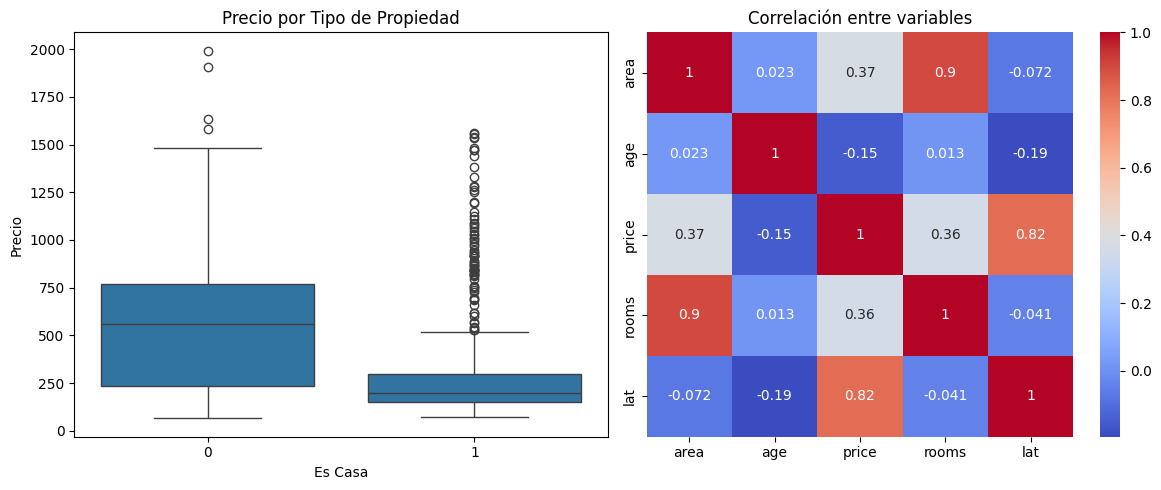


Conclusiones del análisis exploratorio:
1. Existe una correlación positiva entre el área y el precio
2. El número de habitaciones también muestra correlación positiva con el precio
3. La edad de la propiedad tiene una relación menos clara con el precio
4. Las propiedades con pileta tienden a tener precios más altos
5. Las casas muestran una distribución de precios diferente a los departamentos


In [61]:
# Crear pairplot para visualizar relaciones entre variables
import seaborn as sns
import matplotlib.pyplot as plt

# Crear pairplot con todas las variables numéricas
plt.figure(figsize=(12, 8))
# sns.pairplot(df[['area', 'age', 'price', 'rooms','lat']], diag_kind='hist')
plt.tight_layout()
plt.show()

# Crear boxplots adicionales para variables categóricas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x='is_house', y='price', ax=axes[0])
axes[0].set_title('Precio por Tipo de Propiedad')
axes[0].set_xlabel('Es Casa')
axes[0].set_ylabel('Precio')

# agregar un grafico de correlacion entre las variables
sns.heatmap(df[['area', 'age', 'price', 'rooms','lat']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.tight_layout()
plt.show()

# Conclusiones:
print("\nConclusiones del análisis exploratorio:")
print("1. Existe una correlación positiva entre el área y el precio")
print("2. El número de habitaciones también muestra correlación positiva con el precio")
print("3. La edad de la propiedad tiene una relación menos clara con el precio")
print("4. Las propiedades con pileta tienden a tener precios más altos")
print("5. Las casas muestran una distribución de precios diferente a los departamentos")



1.3) Divida el conjunto de desarrollo casas_dev.csv en un 80 % para entrenamiento (train) y un 20 % para validación (validation). Estos conjuntos se utilizarán para entrenar y validar los modelos que desarrollarán en las siguientes secciones. Se sugiere normalizar los datos para lograr un mejora el condicionamiento numérico de los algortmos de aprendizaje. Recuerde que si normaliza los datos, cuando haga una predicción deberá invertir la normalización para volver a las escalas originales.

In [62]:
# Manejar valores faltantes antes de la división
# df = handle_missing_values(df)

# Dividir en conjuntos de entrenamiento y validación (80-20)
train_df, val_df = train_val_split(df, test_size=0.2, random_state=RANDOM_STATE)

print("Tamaño del conjunto de entrenamiento:", len(train_df))
print("Tamaño del conjunto de validación:", len(val_df))

# Columnas numéricas a normalizar
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Normalizar conjunto de entrenamiento y obtener parámetros
train_df_normalized, normalization_params = min_max_normalize(train_df.copy(), numeric_columns)

# Normalizar conjunto de validación usando los mismos parámetros
val_df_normalized = val_df.copy()
for col in numeric_columns:
    min_val, max_val = normalization_params[col]
    val_df_normalized[col] = (val_df_normalized[col] - min_val) / (max_val - min_val)

print("\nRango de valores después de la normalización (conjunto de entrenamiento):")
print(train_df_normalized[numeric_columns].describe().loc[['min', 'max']])

def inverse_normalize_price(normalized_price,normalization_parameters):
    min_price, max_price = normalization_parameters['price']
    return normalized_price * (max_price - min_price) + min_price

# guardar los conjuntos de entrenamiento y validación normalizados
train_df_normalized.to_csv('../data/processed/train_df_normalized.csv', index=False)
val_df_normalized.to_csv('../data/processed/val_df_normalized.csv', index=False)


Tamaño del conjunto de entrenamiento: 720
Tamaño del conjunto de validación: 180

Rango de valores después de la normalización (conjunto de entrenamiento):
     area  is_house  has_pool  age  price  lat  lon  rooms
min   0.0       0.0       0.0  0.0    0.0  0.0  0.0    0.0
max   1.0       1.0       1.0  1.0    1.0  1.0  1.0    1.0


Implementacion de Regresion Lineal

Implemente una clase de regresión lineal. El constructor deberá recibir X e y, y se deberá incluir como métodos de entrenamiento de la clase: entrenamiento mediante la pseudo-inversa y entrenamiento mediante descenso por gradiente. En ambos casos se debe almacenar como atributo self.coef los coeficientes (pesos) resultantes de la regresión. NOTA: Asegúrese de que haya un método que permita imprimir los coeficientes con los nombres de sus respectivas variables de forma prolija.

In [63]:
# Preparar datos para el modelo
X = train_df_normalized[['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms']].values
y = train_df_normalized['price'].values

# Crear y entrenar el modelo usando pseudo-inversa
model_pinv = LinearRegression(X, y)
model_pinv.fit_pseudo_inverse()

print("Coeficientes usando pseudo-inversa:")
model_pinv.print_coefficients(['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms'])

print("\nCoeficientes usando descenso por gradiente:")
# Crear y entrenar el modelo usando descenso por gradiente
model_gd = LinearRegression(X, y)
model_gd.fit_gradient_descent(lr=0.01, epochs=1000)
model_gd.print_coefficients(['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms'])


Coeficientes usando pseudo-inversa:
area: 0.4877678020871947
is_house: 0.03995868873174327
has_pool: 0.02338096995277894
age: -0.026537143106500016
lat: 0.2310691983253036
lon: -0.09898524633197736
rooms: 0.01463357222106687

Coeficientes usando descenso por gradiente:
area: 0.11147786582797035
is_house: 0.014376015928980761
has_pool: 0.013411082625081496
age: 0.041874366921225356
lat: 0.25060489396210534
lon: -0.06736767932521104
rooms: 0.15237112294212127


2.2) Implemente la función de pérdida utilizando el Error Cuadrático Medio (ECM).

In [64]:
# Calcular predicciones y ECM para ambos modelos en conjunto de entrenamiento
y_pred_pinv = model_pinv.predict(X)
y_pred_gd = model_gd.predict(X)

print("Error Cuadrático Medio en conjunto de entrenamiento:")
print(f"Modelo con pseudo-inversa: {MSE(y, y_pred_pinv):.4f}")
print(f"Modelo con descenso por gradiente: {MSE(y, y_pred_gd):.4f}")

# Calcular predicciones y ECM para ambos modelos en conjunto de validación
X_val = val_df_normalized[['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms']].values
y_val = val_df_normalized['price'].values

y_val_pred_pinv = model_pinv.predict(X_val)
y_val_pred_gd = model_gd.predict(X_val)

print("\nError Cuadrático Medio en conjunto de validación:")
print(f"Modelo con pseudo-inversa: {MSE(y_val, y_val_pred_pinv):.4f}")
print(f"Modelo con descenso por gradiente: {MSE(y_val, y_val_pred_gd):.4f}")


Error Cuadrático Medio en conjunto de entrenamiento:
Modelo con pseudo-inversa: 0.0630
Modelo con descenso por gradiente: 0.0592

Error Cuadrático Medio en conjunto de validación:
Modelo con pseudo-inversa: 0.0538
Modelo con descenso por gradiente: 0.0519


2.3) Verifique que su implementación de la regresión lineal funcione correctamente tanto
para cuando se tiene una característica como para múltiples características.

In [65]:
# Probar con una sola característica (área)
X_single = X[:, 0:1]  # Tomamos solo la columna de área
y_single = y

# Entrenar modelos con una característica
model_single_pinv = LinearRegression(X_single, y_single)
model_single_pinv.fit_pseudo_inverse()

model_single_gd = LinearRegression(X_single, y_single)
model_single_gd.fit_gradient_descent(lr=0.01, epochs=1000)

print("Resultados con una característica (área):")
print("\nCoeficientes usando pseudo-inversa:")
model_single_pinv.print_coefficients(['area'])

print("\nCoeficientes usando descenso por gradiente:")
model_single_gd.print_coefficients(['area'])

# Calcular predicciones y ECM para ambos modelos con una característica
y_pred_single_pinv = model_single_pinv.predict(X_single)
y_pred_single_gd = model_single_gd.predict(X_single)

print("\nError Cuadrático Medio en conjunto de entrenamiento (una característica):")
print(f"Modelo con pseudo-inversa: {MSE(y_single, y_pred_single_pinv):.4f}")
print(f"Modelo con descenso por gradiente: {MSE(y_single, y_pred_single_gd):.4f}")

# Comparar con los resultados anteriores de múltiples características
print("\nError Cuadrático Medio con todas las características:")
print(f"Modelo con pseudo-inversa: {MSE(y, y_pred_pinv):.4f}")
print(f"Modelo con descenso por gradiente: {MSE(y, y_pred_gd):.4f}")


Resultados con una característica (área):

Coeficientes usando pseudo-inversa:
area: 0.6774700193061794

Coeficientes usando descenso por gradiente:
area: 0.4335805014193679

Error Cuadrático Medio en conjunto de entrenamiento (una característica):
Modelo con pseudo-inversa: 0.0449
Modelo con descenso por gradiente: 0.0456

Error Cuadrático Medio con todas las características:
Modelo con pseudo-inversa: 0.0630
Modelo con descenso por gradiente: 0.0592


Aplicación de Modelos de Regresión
3.1) Realice una regresión lineal simple (con una sola característica) para predecir el precio
de una propiedad utilizando como variable explicativa solo el area.

Coeficientes del modelo:
area: 0.667925133446314

Métricas en conjunto de entrenamiento:
MSE: 0.0300
RMSE: 0.1731
MAE: 0.1559
R2: 0.0783

Métricas en conjunto de validación:
MSE: 0.0311
RMSE: 0.1764
MAE: 0.1571
R2: 0.1929


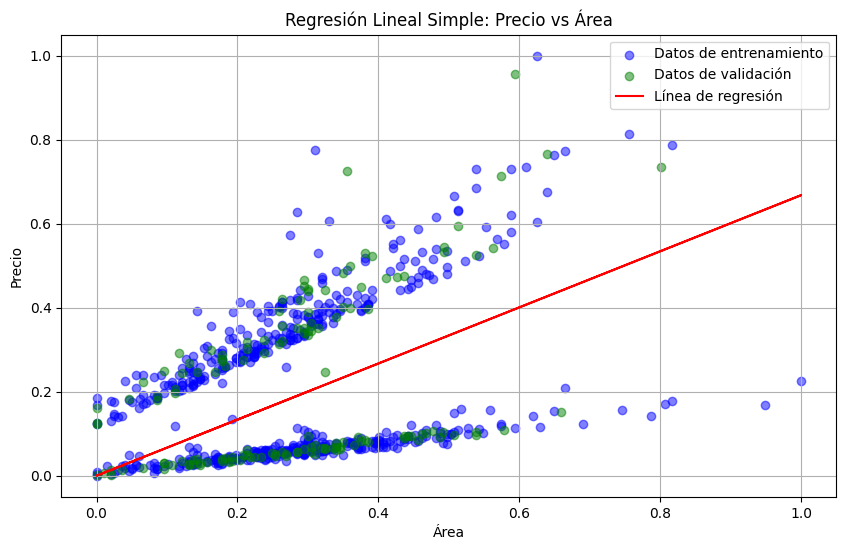

In [66]:
# Crear un modelo de regresión lineal simple usando solo el área
X_area = X[:, 0:1]  # Seleccionamos solo la columna del área
y_precio = y

# Dividir los datos en conjuntos de entrenamiento y validación
X_train_area, X_val_area = train_val_split(pd.DataFrame(X_area), test_size=0.2)[0].values, train_val_split(pd.DataFrame(X_area), test_size=0.2)[1].values
y_train_precio, y_val_precio = train_val_split(pd.DataFrame(y_precio), test_size=0.2)[0].values, train_val_split(pd.DataFrame(y_precio), test_size=0.2)[1].values

# Entrenar el modelo usando pseudo-inversa
modelo_area = LinearRegression(X_train_area, y_train_precio)
modelo_area.fit_pseudo_inverse()

# Realizar predicciones en conjuntos de entrenamiento y validación
y_train_pred = modelo_area.predict(X_train_area)
y_val_pred = modelo_area.predict(X_val_area)

# Calcular métricas de rendimiento
print("Coeficientes del modelo:")
modelo_area.print_coefficients(['area'])

print("\nMétricas en conjunto de entrenamiento:")
print(f"MSE: {MSE(y_train_precio, y_train_pred):.4f}")
print(f"RMSE: {RMSE(y_train_precio, y_train_pred):.4f}")
print(f"MAE: {MAE(y_train_precio, y_train_pred):.4f}")
print(f"R2: {R2(y_train_precio, y_train_pred):.4f}")

print("\nMétricas en conjunto de validación:")
print(f"MSE: {MSE(y_val_precio, y_val_pred):.4f}")
print(f"RMSE: {RMSE(y_val_precio, y_val_pred):.4f}")
print(f"MAE: {MAE(y_val_precio, y_val_pred):.4f}")
print(f"R2: {R2(y_val_precio, y_val_pred):.4f}")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_train_area, y_train_precio, color='blue', alpha=0.5, label='Datos de entrenamiento')
plt.scatter(X_val_area, y_val_precio, color='green', alpha=0.5, label='Datos de validación')
plt.plot(X_train_area, y_train_pred, color='red', label='Línea de regresión')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.title('Regresión Lineal Simple: Precio vs Área')
plt.legend()
plt.grid(True)
plt.show()


3.2) Desarrolle un modelo de regresión lineal que prediga el precio en función de las caraceterísticas que considere relevantes. Utilizando el modelo entrenado, prediga el precio de vivienda_Amanda.csv.

In [67]:
# Seleccionar características relevantes basadas en el análisis anterior
features = ['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms']

X = train_df_normalized[features].values
y = train_df_normalized['price'].values

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val = train_val_split(pd.DataFrame(X), test_size=0.2)[0].values, train_val_split(pd.DataFrame(X), test_size=0.2)[1].values
y_train, y_val = train_val_split(pd.DataFrame(y), test_size=0.2)[0].values, train_val_split(pd.DataFrame(y), test_size=0.2)[1].values

# Entrenar modelo usando todas las características
modelo_completo = LinearRegression(X_train, y_train)
modelo_completo.fit_pseudo_inverse()

# Realizar predicciones
y_train_pred = modelo_completo.predict(X_train)
y_val_pred = modelo_completo.predict(X_val)

# Imprimir coeficientes y métricas
print("Coeficientes del modelo:")
modelo_completo.print_coefficients(features)

print("\nMétricas en conjunto de entrenamiento:")
print(f"MSE: {MSE(y_train, y_train_pred):.4f}")
print(f"RMSE: {RMSE(y_train, y_train_pred):.4f}")
print(f"MAE: {MAE(y_train, y_train_pred):.4f}")
print(f"R2: {R2(y_train, y_train_pred):.4f}")

print("\nMétricas en conjunto de validación:")
print(f"MSE: {MSE(y_val, y_val_pred):.4f}")
print(f"RMSE: {RMSE(y_val, y_val_pred):.4f}")
print(f"MAE: {MAE(y_val, y_val_pred):.4f}")
print(f"R2: {R2(y_val, y_val_pred):.4f}")

# Cargar y preparar datos de Amanda
file_name = os.path.join(cwd, '..', 'data', 'raw', 'vivienda_Amanda.csv')
amanda_df = pd.read_csv(file_name)

for index, row in amanda_df.iterrows():
    if row['area_units'] == 'sqft':
        amanda_df.at[index, 'area'] = row['area'] * 0.092903
    else:
        amanda_df.at[index, 'area'] = row['area'] 


# Normalizar los datos de Amanda usando la misma escala que los datos de entrenamiento
amanda_normalized = pd.DataFrame()
for col in features:
    min_val, max_val = normalization_params[col]
    amanda_normalized[col] = (amanda_df[col] - min_val) / (max_val - min_val)

# Predecir precio para la vivienda de Amanda
X_amanda = amanda_normalized[features].values
precio_amanda_norm = modelo_completo.predict(X_amanda)

# Desnormalizar el precio predicho
precio_amanda = inverse_normalize_price(precio_amanda_norm, normalization_params)

print("\nPrecio predicho para la vivienda de Amanda:")
print(f"${precio_amanda[0][0]:,.2f}")

Coeficientes del modelo:
area: 0.48311746331110506
is_house: 0.03973455468380707
has_pool: 0.024288523457596245
age: -0.027466904543607118
lat: 0.2330626702770564
lon: -0.09324231794254734
rooms: 0.00778192196290739

Métricas en conjunto de entrenamiento:
MSE: 0.0043
RMSE: 0.0653
MAE: 0.0460
R2: 0.8687

Métricas en conjunto de validación:
MSE: 0.0051
RMSE: 0.0712
MAE: 0.0488
R2: 0.8686

Precio predicho para la vivienda de Amanda:
$794.98


3.3) En el dataset, ¿cuál es el valor promedio por metro cuadrado de una casa?

In [68]:
df = pd.read_csv('../data/raw/casas_dev.csv')

# Convertir sqft a m2
for index, row in df.iterrows():
    if row['area_units'] == 'sqft':
        df.at[index, 'area'] = row['area'] * 0.092903
    else:
        df.at[index, 'area'] = row['area']



# valor promedio por metro cuadrado de las casas en el dataset de entrenamiento con todas las casas convertidas a m2
valor_por_m2_casas = df[df['is_house'] == 1 ]['price'] / df[df['is_house'] == 1]['area']
valor_promedio_m2_casas = valor_por_m2_casas.mean()
print(f"El valor promedio por metro cuadrado de las casas es: ${valor_promedio_m2_casas:,.2f}")





El valor promedio por metro cuadrado de las casas es: $3.58


3.4) Benito está evaluando la posibilidad de construir una pileta. ¿Cómo afectaría la construcción de una pileta al precio de su propiedad? Explique cómo llegó a este resultado.

Análisis del impacto de construir una pileta:
Precio promedio estimado sin pileta: $464.59
Precio promedio estimado con pileta: $504.64

La construcción de una pileta aumentaría el valor en un promedio de: $40.04
Esto representa un aumento del 8.6% en el valor de la propiedad


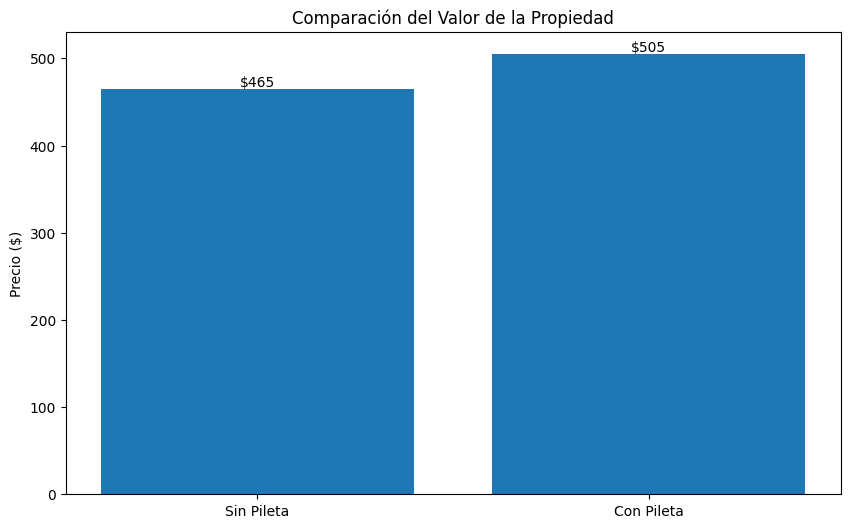

In [69]:
# Crear una copia de los datos de Benito
benito_con_pileta = train_df_normalized.copy()

features = ['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms']

X = train_df_normalized[features].values
y = train_df_normalized['price'].values

# Dividir en conjuntos de entrenamiento y validación
X_train, X_val = train_val_split(pd.DataFrame(X), test_size=0.2)[0].values, train_val_split(pd.DataFrame(X), test_size=0.2)[1].values
y_train, y_val = train_val_split(pd.DataFrame(y), test_size=0.2)[0].values, train_val_split(pd.DataFrame(y), test_size=0.2)[1].values

# Entrenar modelo usando todas las características
modelo_completo = LinearRegression(X_train, y_train)
modelo_completo.fit_pseudo_inverse()

# Modificar el valor de has_pool a 1 (tiene pileta)
benito_con_pileta['has_pool'] = 1

#  area  is_house  has_pool       age     price       lat       lon   rooms

# Predecir precio para ambos casos
X_benito_sin_pileta = train_df_normalized[features].values
X_benito_con_pileta = benito_con_pileta[features].values

precio_sin_pileta_norm = modelo_completo.predict(X_benito_sin_pileta)
precio_con_pileta_norm = modelo_completo.predict(X_benito_con_pileta)

# Desnormalizar los precios predichos
precio_sin_pileta = inverse_normalize_price(precio_sin_pileta_norm, normalization_params)
precio_con_pileta = inverse_normalize_price(precio_con_pileta_norm, normalization_params)

# Calcular la diferencia
diferencia = precio_con_pileta - precio_sin_pileta

print("Análisis del impacto de construir una pileta:")
precio_sin_pileta_prom = np.mean(precio_sin_pileta)
precio_con_pileta_prom = np.mean(precio_con_pileta)
diferencia_prom = precio_con_pileta_prom - precio_sin_pileta_prom

print(f"Precio promedio estimado sin pileta: ${precio_sin_pileta_prom:,.2f}")
print(f"Precio promedio estimado con pileta: ${precio_con_pileta_prom:,.2f}")
print(f"\nLa construcción de una pileta aumentaría el valor en un promedio de: ${diferencia_prom:,.2f}")
print(f"Esto representa un aumento del {(diferencia_prom/precio_sin_pileta_prom*100):.1f}% en el valor de la propiedad")

# Visualizar la comparación
plt.figure(figsize=(10, 6))
bars = plt.bar(['Sin Pileta', 'Con Pileta'], [precio_sin_pileta_prom, precio_con_pileta_prom])
plt.title('Comparación del Valor de la Propiedad')
plt.ylabel('Precio ($)')

# Agregar etiquetas de valor en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}',
             ha='center', va='bottom')

plt.show()


4. Feature Engineering
El feature engineering es una técnica que se utiliza para aportar mayor flexibilidad a los
modelos.
4.1) Construya un conjunto de características derivadas a partir de las originales, que le pa-
rezca relevante para predecir el precio de una propiedad, utilizando técnicas de Feature
Engineering.

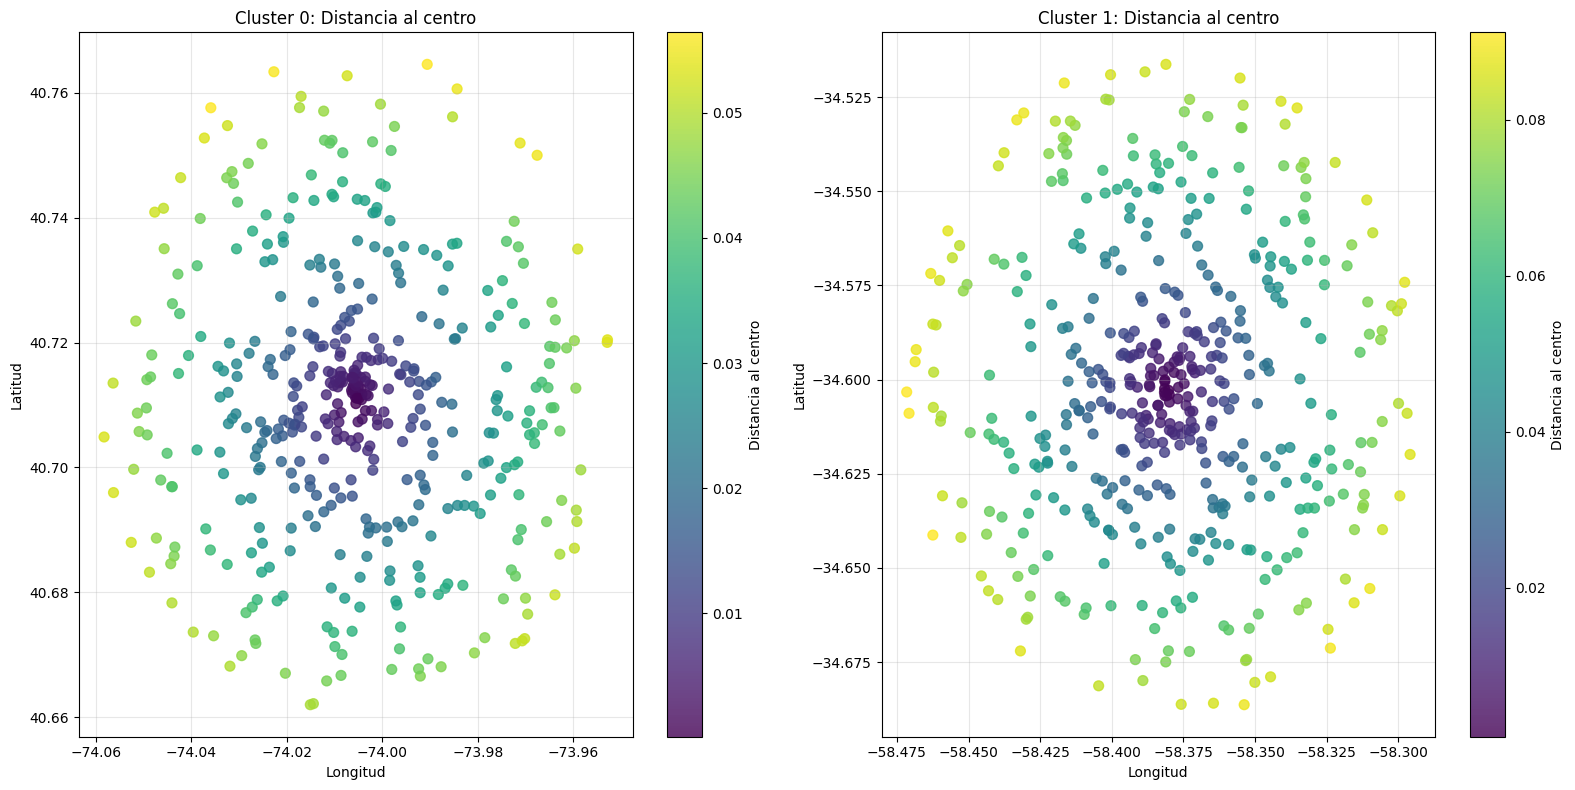

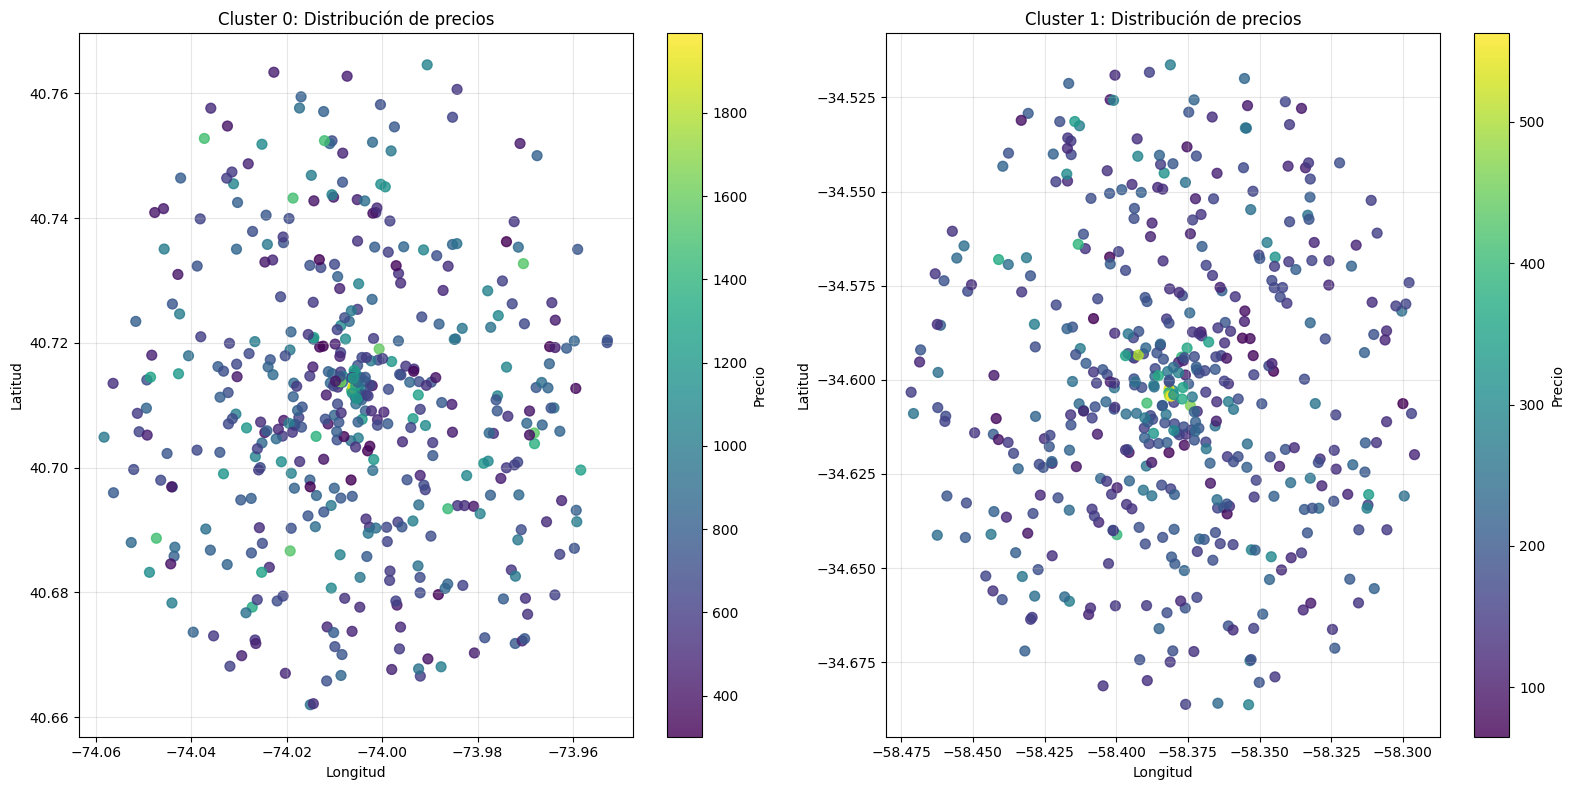

In [70]:
# Creamos nuevas características derivadas

df = pd.read_csv('../data/raw/casas_dev.csv')

# Convertir sqft a m2
mask_sqft = df['area_units'] == 'sqft'
df.loc[mask_sqft, 'area'] = df.loc[mask_sqft, 'area'] * 0.092903

# Verificar y manejar valores faltantes en las nuevas columnas
df = handle_missing_values(df)

# Usar one hot encoding para dividir area_units entre sqft y m2 y llamarlo cluster
df, encoder_dict = one_hot_encoder(df, ['area_units'])

# Crear nuevas características derivadas
df['cluster'] = df['area_units_m2']

# eliminar las colunnas area_units_m2 y area_units_sqft
df.drop(columns=['area_units_m2', 'area_units_sqft'], inplace=True) 


clusters = df['cluster'].unique()
cluster_center = []

for cluster in clusters:
    cluster_data = df[df['cluster'] == cluster]
    center_lat = cluster_data['lat'].mean()
    center_lon = cluster_data['lon'].mean()
    cluster_center.append([cluster, center_lat, center_lon])

cluster_center = pd.DataFrame(cluster_center, columns=['cluster', 'center_lat', 'center_lon'])
cluster_center.columns = ['cluster', 'center_lat', 'center_lon']

# Unir el centro del cluster con el DataFrame original
df = df.merge(cluster_center, on='cluster', how='left')

# Calcular la distancia desde el centro del cluster
df['distance_from_center'] = np.sqrt((df['lat'] - df['center_lat'])**2 + (df['lon'] - df['center_lon'])**2)

# Crear visualización de clusters con mapa de calor de distancia al centro
plt.figure(figsize=(16, 8))

# Gráfico para Cluster 0
plt.subplot(1, 2, 1)
cluster0 = df[df['cluster'] == 0]
scatter0 = plt.scatter(cluster0['lon'], cluster0['lat'], 
                      c=cluster0['distance_from_center'], 
                      cmap='viridis', 
                      alpha=0.8, 
                      s=50)
plt.colorbar(scatter0, label='Distancia al centro')
plt.title('Cluster 0: Distancia al centro')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)

# Gráfico para Cluster 1
plt.subplot(1, 2, 2)
cluster1 = df[df['cluster'] == 1]
scatter1 = plt.scatter(cluster1['lon'], cluster1['lat'], 
                      c=cluster1['distance_from_center'], 
                      cmap='viridis', 
                      alpha=0.8, 
                      s=50)
plt.colorbar(scatter1, label='Distancia al centro')
plt.title('Cluster 1: Distancia al centro')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Crear visualización de clusters con mapa de calor de precios
plt.figure(figsize=(16, 8))

# Gráfico para Cluster 0
plt.subplot(1, 2, 1)
cluster0 = df[df['cluster'] == 0]
scatter0 = plt.scatter(cluster0['lon'], cluster0['lat'], 
                      c=cluster0['price'], 
                      cmap='viridis', 
                      alpha=0.8, 
                      s=50)
plt.colorbar(scatter0, label='Precio')
plt.title('Cluster 0: Distribución de precios')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)

# Gráfico para Cluster 1
plt.subplot(1, 2, 2)
cluster1 = df[df['cluster'] == 1]
scatter1 = plt.scatter(cluster1['lon'], cluster1['lat'], 
                      c=cluster1['price'], 
                      cmap='viridis', 
                      alpha=0.8, 
                      s=50)
plt.colorbar(scatter1, label='Precio')
plt.title('Cluster 1: Distribución de precios')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Eliminar las columnas de centro de cluster ya que no son necesarias
df.drop(columns=['center_lat', 'center_lon'], inplace=True)

In [71]:
# Separar en conjuntos de entrenamiento y validación
train_df, val_df = train_val_split(df, test_size=0.2, random_state=RANDOM_STATE)

print(f"Tamaño del conjunto de entrenamiento: {len(train_df)}")
print(f"Tamaño del conjunto de validación: {len(val_df)}")

columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Normalizar los conjuntos de entrenamiento y validación usando Min-Max
train_df_norm, params_norm = min_max_normalize(train_df, columnas_numericas)
val_df_norm = val_df.copy()

# Aplicar los mismos parámetros de normalización al conjunto de validación
for col in columnas_numericas:
    min_val, max_val = params_norm[col]
    val_df_norm[col] = (val_df_norm[col] - min_val) / (max_val - min_val)

# Mostrar los datos normalizados usando pretty_print_df
print("Datos normalizados:")
pretty_print_df(train_df_norm, num_rows=5, title="Conjunto de entrenamiento")
pretty_print_df(val_df_norm, num_rows=5, title="Conjunto de validación")

# Mostrar estadísticas descriptivas de las columnas numéricas
pretty_print_df(train_df_norm[columnas_numericas].describe(), title="Estadísticas del conjunto de entrenamiento")
pretty_print_df(val_df_norm[columnas_numericas].describe(), title="Estadísticas del conjunto de validación")

# Guardar los conjuntos de datos procesados
train_df_norm.to_csv('../data/processed/casas_train_processed.csv', index=False)
val_df_norm.to_csv('../data/processed/casas_val_processed.csv', index=False)

# Mostrar las columnas después del procesamiento
pretty_print_df(pd.DataFrame({'Columnas': df.columns.tolist()}), title="Columnas después de one-hot encoding")


Tamaño del conjunto de entrenamiento: 720
Tamaño del conjunto de validación: 180
Datos normalizados:


c:\Users\mmatt\workspace\facultad\tercero\ML\ML\tp1\notebooks\..\src\preprocessing.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - min_val) / (max_val - min_val)
c:\Users\mmatt\workspace\facultad\tercero\ML\ML\tp1\notebooks\..\src\preprocessing.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col] - min_val) / (max_val - min_val)
c:\Users\mmatt\workspace\facultad\tercero\ML\ML\tp1\notebooks\..\src\preprocessing.py:45: SettingWithCopyWarning: 
A value is trying to 

### Conjunto de entrenamiento

|     |     area |   is_house |   has_pool |      age |     price |        lat |        lon |   rooms |   cluster |   distance_from_center |
|----:|---------:|-----------:|-----------:|---------:|----------:|-----------:|-----------:|--------:|----------:|-----------------------:|
| 415 | 0.147345 |          0 |          0 | 0.631579 | 0.23041   | 0.999536   | 0.00382125 |    0.25 |         0 |              0.235922  |
| 363 | 0.137056 |          1 |          1 | 0.684211 | 0.0373638 | 0.00112883 | 0.995882   |    0.25 |         1 |              0.213911  |
| 156 | 0.507614 |          1 |          0 | 0.368421 | 0.104826  | 0.00202922 | 0.996256   |    0.75 |         1 |              0.806636  |
| 895 | 0.410963 |          0 |          0 | 0.526316 | 0.612351  | 0.999334   | 0.00319078 |    0.5  |         0 |              0.0455065 |
| 299 | 0.446701 |          0 |          0 | 0.421053 | 0.0944473 | 0.00102442 | 0.993845   |    0.5  |         1 |              0.156312  |

*Mostrando 5 de 720 filas*

### Conjunto de validación

|     |      area |   is_house |   has_pool |      age |     price |         lat |        lon |   rooms |   cluster |   distance_from_center |
|----:|----------:|-----------:|-----------:|---------:|----------:|------------:|-----------:|--------:|----------:|-----------------------:|
| 266 | 0.421338  |          0 |          0 | 0.526316 | 0.541256  | 0.999344    | 0.00322619 |    0.75 |         0 |              0.0531437 |
| 632 | 0.370558  |          1 |          0 | 0.526316 | 0.0716139 | 0.000518809 | 0.994621   |    0.5  |         1 |              0.494642  |
| 215 | 0.0558566 |          0 |          0 | 0.526316 | 0.17177   | 0.999162    | 0.00279804 |    0.25 |         0 |              0.120793  |
| 249 | 0.187817  |          1 |          0 | 0.736842 | 0.035288  | 0.00181388  | 0.994425   |    0.25 |         1 |              0.578992  |
| 247 | 0.193089  |          0 |          0 | 0.526316 | 0.258433  | 0.998778    | 0.00188644 |    0.25 |         0 |              0.474781  |

*Mostrando 5 de 180 filas*

### Estadísticas del conjunto de entrenamiento

|       |       area |   is_house |   has_pool |        age |       price |          lat |          lon |      rooms |    cluster |   distance_from_center |
|:------|-----------:|-----------:|-----------:|-----------:|------------:|-------------:|-------------:|-----------:|-----------:|-----------------------:|
| count | 720        | 720        | 720        | 720        | 720         | 720          | 720          | 720        | 720        |             720        |
| mean  |   0.280322 |   0.425    |   0.144444 |   0.487354 |   0.208155  |   0.47387    |   0.525096   |   0.443056 |   0.526389 |               0.404538 |
| std   |   0.153508 |   0.494687 |   0.351784 |   0.238162 |   0.183768  |   0.498737   |   0.495368   |   0.226972 |   0.49965  |               0.259541 |
| min   |   0        |   0        |   0        |   0        |   0         |   0          |   0          |   0        |   0        |               0        |
| 25%   |   0.172811 |   0        |   0        |   0.315789 |   0.0581214 |   0.00107508 |   0.00324843 |   0.25     |   0        |               0.186532 |

*Mostrando 5 de 8 filas*

### Estadísticas del conjunto de validación

|       |       area |   is_house |   has_pool |        age |        price |           lat |           lon |      rooms |    cluster |   distance_from_center |
|:------|-----------:|-----------:|-----------:|-----------:|-------------:|--------------:|--------------:|-----------:|-----------:|-----------------------:|
| count | 180        | 180        | 180        | 180        | 180          | 180           | 180           | 180        | 180        |            180         |
| mean  |   0.26944  |   0.394444 |   0.144444 |   0.504971 |   0.208369   |   0.533418    |   0.465901    |   0.426389 |   0.466667 |              0.4015    |
| std   |   0.153101 |   0.490094 |   0.35252  |   0.209989 |   0.165293   |   0.499347    |   0.495967    |   0.232933 |   0.500279 |              0.245487  |
| min   |   0        |   0        |   0        |   0        |   0.00415153 |  -1.32939e-06 |  -0.000119893 |   0        |   0        |              0.0107832 |
| 25%   |   0.167596 |   0        |   0        |   0.368421 |   0.0611053  |   0.00106027  |   0.00300435  |   0.25     |   0        |              0.197116  |

*Mostrando 5 de 8 filas*

### Columnas después de one-hot encoding

|    | Columnas   |
|---:|:-----------|
|  0 | area       |
|  1 | is_house   |
|  2 | has_pool   |
|  3 | age        |
|  4 | price      |

*Mostrando 5 de 10 filas*

Vemos que no es tan obvio, pero se aprecia que las casas más cercanas al centro del cluster tienden a ser más caras, entonces la feature de distancia al centro puede ayudar bastante con la predicción.

4.2) Realice una regresión lineal como en 3.2), incorporando las características que desarrolló
en el punto 4.1).

Características de X_train:
Forma: (720, 8)
Tipo de datos: float64

Primeras 5 filas de X_train:
Fila 1: [0.14734482 0.         0.         0.63157895 0.99953645 0.00382125
 0.25       0.23592168]
Fila 2: [0.13705584 1.         1.         0.68421053 0.00112883 0.99588197
 0.25       0.21391119]
Fila 3: [0.50761421 1.         0.         0.36842105 0.00202922 0.99625581
 0.75       0.80663644]
Fila 4: [0.41096297 0.         0.         0.52631579 0.99933445 0.00319078
 0.5        0.04550645]
Fila 5: [0.44670051 0.         0.         0.42105263 0.00102442 0.99384511
 0.5        0.15631157]

Nombres de las características:
0: area
1: is_house
2: has_pool
3: age
4: lat
5: lon
6: rooms
7: distance_from_center
Métricas del modelo lineal:
MSE (train): 0.0634
MSE (val): 0.0541
R2 (train): -0.8795
R2 (val): -0.9901

Coeficientes del modelo lineal:
area: 0.49063265851428445
is_house: 0.05403803531094281
has_pool: 0.02411513597702339
age: -0.02716417797409343
lat: 0.251699225408873
lon: -0.066369431

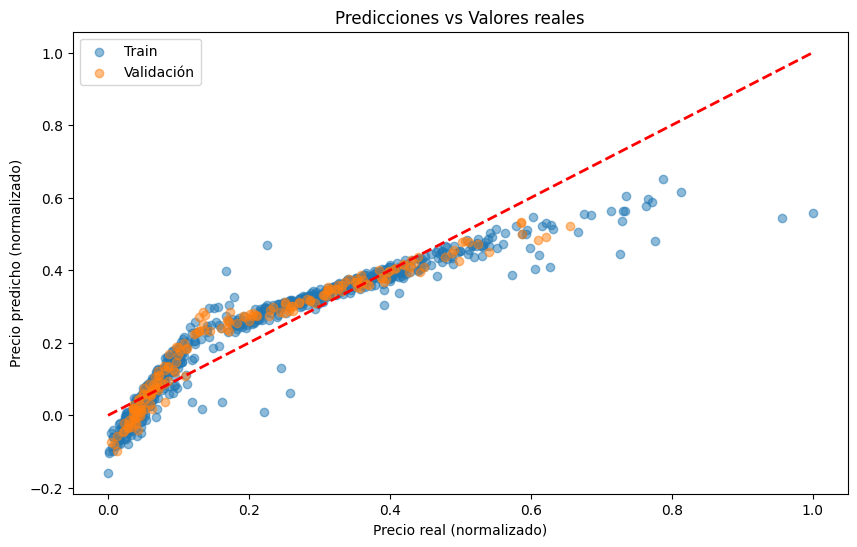

In [72]:
# Seleccionar las características para el modelo
features = ['area', 'is_house', 'has_pool', 'age', 'lat', 'lon', 'rooms', 'distance_from_center']

# Preparar X e y para entrenamiento
X_train = train_df_norm[features].values
# Mostrar las características de X_train
print("Características de X_train:")
print(f"Forma: {X_train.shape}")
print(f"Tipo de datos: {X_train.dtype}")
print("\nPrimeras 5 filas de X_train:")
for i, fila in enumerate(X_train[:5]):
    print(f"Fila {i+1}: {fila}")

print("\nNombres de las características:")
for i, feature in enumerate(features):
    print(f"{i}: {feature}")

y_train = train_df_norm['price'].values

# Preparar X e y para validación
X_val = val_df_norm[features].values 
y_val = val_df_norm['price'].values

# Entrenar el modelo usando regresión lineal
modelo_lineal = LinearRegression(X_train, y_train)
modelo_lineal.fit_pseudo_inverse()

# Realizar predicciones
y_pred_train = modelo_lineal.predict(X_train)
y_pred_val = modelo_lineal.predict(X_val)

# Calcular métricas
mse_train = MSE(y_train, y_pred_train)
mse_val = MSE(y_val, y_pred_val)
r2_train = R2(y_train, y_pred_train)
r2_val = R2(y_val, y_pred_val)

print("Métricas del modelo lineal:")
print(f"MSE (train): {mse_train:.4f}")
print(f"MSE (val): {mse_val:.4f}")
print(f"R2 (train): {r2_train:.4f}")
print(f"R2 (val): {r2_val:.4f}")

# Imprimir coeficientes
print("\nCoeficientes del modelo lineal:")
modelo_lineal.print_coefficients(features)

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_val, y_pred_val, alpha=0.5, label='Validación')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Precio real (normalizado)')
plt.ylabel('Precio predicho (normalizado)')
plt.title('Predicciones vs Valores reales')
plt.legend()
plt.show()


4.3) Repita el proceso del ítem anterior generando 300 nuevos features como potencias de
los features anteriores (por ejemplo: [x1^2,x2^5,...,xn^12]).

Número de features originales: 8
Número de features expandidos: 310
Métricas del modelo con features expandidos:
MSE (train): 0.0604
MSE (val): 0.0513
R2 (train): -0.7898
R2 (val): -0.8879


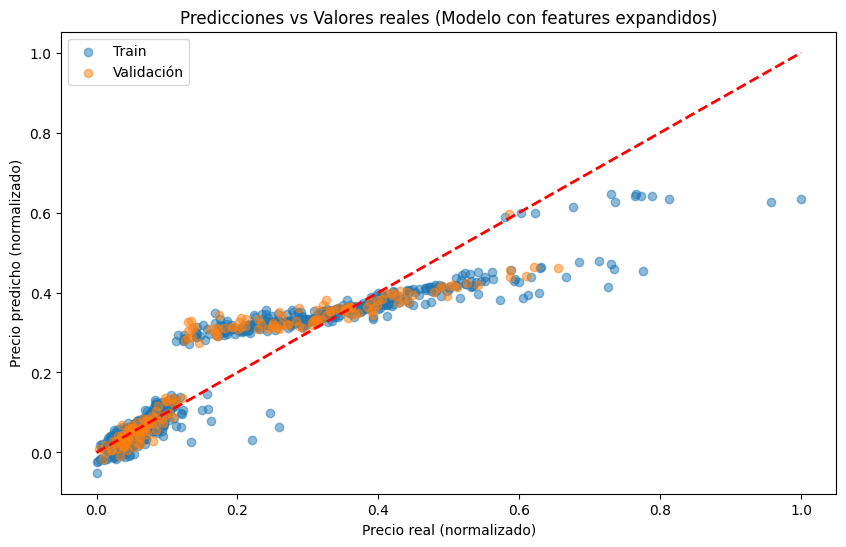

In [73]:
# Generar 300 nuevos features aleatorios
nuevas_columnas_train = {}
nuevas_columnas_val = {}

existing_features = set()

for i in range(300):
    while True:
        # Elegir una feature aleatoria
        feature = np.random.choice(features)
        
        # Elegir una potencia aleatoria entre 2 y 80
        potencia = np.random.randint(2, 80)
        
        # Crear nombre para la nueva columna
        nuevo_nombre = f"{feature}_pow_{potencia}"
        
        # Verificar si la nueva columna ya existe
        if nuevo_nombre not in existing_features:
            existing_features.add(nuevo_nombre)
            break
    
    # Calcular potencias
    nuevas_columnas_train[nuevo_nombre] = train_df_norm[feature] ** potencia
    nuevas_columnas_val[nuevo_nombre] = val_df_norm[feature] ** potencia

# Concatenar todas las nuevas columnas de una vez
train_df_expanded = pd.concat([train_df_norm, pd.DataFrame(nuevas_columnas_train)], axis=1)
val_df_expanded = pd.concat([val_df_norm, pd.DataFrame(nuevas_columnas_val)], axis=1)

# Normalizar los nuevos conjuntos de datos expandidos
train_df_expanded, normalization_params_expanded = min_max_normalize(train_df_expanded, train_df_expanded.columns)
val_df_expanded = val_df_expanded.copy()

# Aplicar los mismos parámetros de normalización al conjunto de validación expandido
for col in train_df_expanded.columns:
    min_val, max_val = normalization_params_expanded[col]
    val_df_expanded[col] = (val_df_expanded[col] - min_val) / (max_val - min_val)



# Preparar matrices de features para entrenamiento y validación
X_train_expanded = train_df_expanded.values
X_val_expanded = val_df_expanded.values

# Obtener lista de features expandidos
features_expandidos = train_df_expanded.columns.tolist()

print(f"Número de features originales: {len(features)}")
print(f"Número de features expandidos: {len(features_expandidos)}")

# Entrenar modelo con features expandidos usando tasa de aprendizaje más pequeña
modelo_expandido = LinearRegression(X_train_expanded, y_train)
modelo_expandido.fit_gradient_descent()

# Realizar predicciones
y_pred_train_exp = modelo_expandido.predict(X_train_expanded)
y_pred_val_exp = modelo_expandido.predict(X_val_expanded)

# Calcular métricas
mse_train_exp = np.mean((y_train - y_pred_train_exp) ** 2)
mse_val_exp = np.mean((y_val - y_pred_val_exp) ** 2)
r2_train_exp = 1 - mse_train_exp / np.var(y_train)
r2_val_exp = 1 - mse_val_exp / np.var(y_val)

print("Métricas del modelo con features expandidos:")
print(f"MSE (train): {mse_train_exp:.4f}")
print(f"MSE (val): {mse_val_exp:.4f}")
print(f"R2 (train): {r2_train_exp:.4f}")
print(f"R2 (val): {r2_val_exp:.4f}")

# Visualizar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_exp, alpha=0.5, label='Train')
plt.scatter(y_val, y_pred_val_exp, alpha=0.5, label='Validación')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Precio real (normalizado)')
plt.ylabel('Precio predicho (normalizado)')
plt.title('Predicciones vs Valores reales (Modelo con features expandidos)')
plt.legend()
plt.show()



5.1) Modifique la clase de Regresión Lineal para que pueda recibir como parámetros dos
coeficientes de regularización L2 y L1, que por defecto serán 0.
5.2) Entrene un modelo de regresión lineal con regularización L2 (a veces llamado “Ridge
regression”) utilizando como características las mismas que en el punto 4.2) y grafique
el valor de los parametros w∗en función del coeficiente de penalización λ.

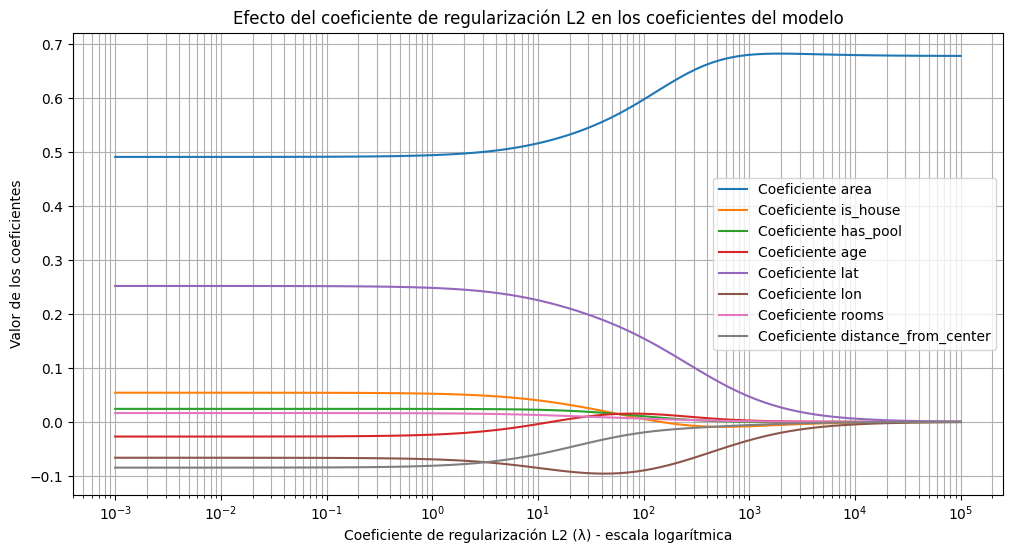

In [74]:
# Definir un rango de valores para el coeficiente de regularización L2 en escala logarítmica
l2_values = np.logspace(-3, 5, 100)  # Valores desde 0.001 hasta 100 en escala logarítmica
coeficientes = []

# Entrenar el modelo para cada valor de L2 y almacenar los coeficientes
for l2 in l2_values:
    modelo_ridge = LinearRegression(X_train, y_train, l2=l2)
    modelo_ridge.fit_normal_equation()
    coeficientes.append(modelo_ridge.coef.flatten())

# Convertir a un array para facilitar la visualización
coeficientes = np.array(coeficientes)

# Graficar los coeficientes en función del coeficiente de penalización L2 en escala logarítmica
plt.figure(figsize=(12, 6))
for i in range(coeficientes.shape[1]):
    plt.semilogx(l2_values, coeficientes[:, i], label=f'Coeficiente {features[i]}')
plt.xlabel('Coeficiente de regularización L2 (λ) - escala logarítmica')
plt.ylabel('Valor de los coeficientes')
plt.title('Efecto del coeficiente de regularización L2 en los coeficientes del modelo')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


5.3) Realice el mismo gráfico del ítem anterior pero ahora utilizando regularización L1 (a
veces llamado “LASSO regression”). Recuerde que no hay una solución analítica para
w∗con regularización L1, por lo cual solo será posible entrenar el modelo mediante
gradiente descendiente. Analice el gráfico obtenido y compárelo con el anterior. ¿Qué
conclusiones se pueden extraer en cuanto al efecto de utilizar regularización L1 vs. L2?

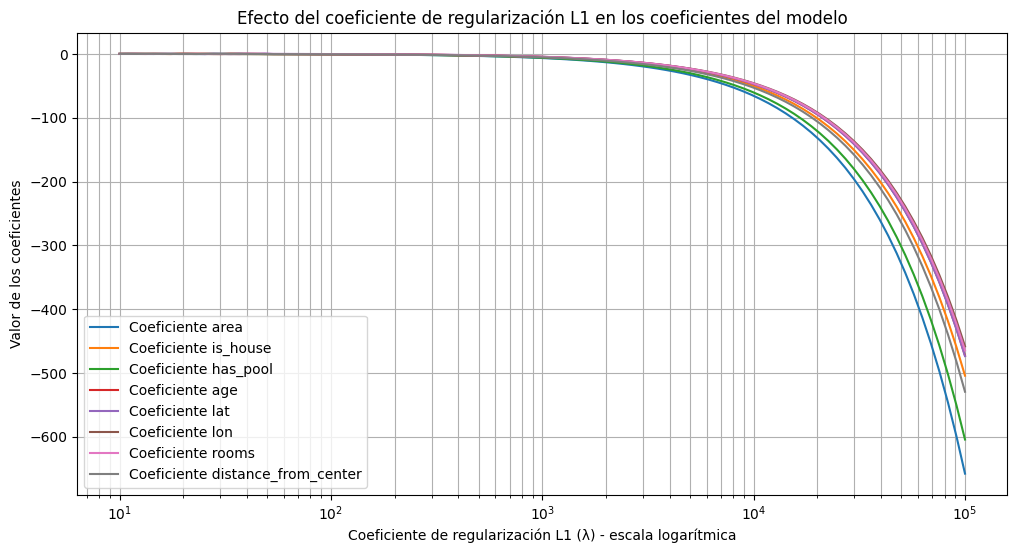

In [75]:
# Definir un rango de valores para el coeficiente de regularización L1 en escala logarítmica
l1_values = np.logspace(1, 5, 100)  # Valores desde 0.001 hasta 10 en escala logarítmica
coeficientes_lasso = []

# Entrenar el modelo para cada valor de L1 y almacenar los coeficientes
for l1 in l1_values:
    modelo_lasso = LinearRegression(X_train, y_train, l1=l1)
    modelo_lasso.fit_gradient_descent()
    coeficientes_lasso.append(modelo_lasso.coef.flatten())

# Convertir a un array para facilitar la visualización
coeficientes_lasso = np.array(coeficientes_lasso)

# Graficar los coeficientes en función del coeficiente de penalización L1 en escala logarítmica
plt.figure(figsize=(12, 6))
for i in range(coeficientes_lasso.shape[1]):
    plt.semilogx(l1_values, coeficientes_lasso[:, i], label=f'Coeficiente {features[i]}')
plt.xlabel('Coeficiente de regularización L1 (λ) - escala logarítmica')
plt.ylabel('Valor de los coeficientes')
plt.title('Efecto del coeficiente de regularización L1 en los coeficientes del modelo')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()


5.4) Ajuste el modelo de regresión del item 4.2) utilizando regularización L2 con coeficiente
de regularización λ elegido de manera fundamentada, tomando como referencia lo gra-
ficado en el punto 5.2). ¿Cuál es el ECM obtenido en el conjunto de validación (y_val)?
Explique en qué beneficia al modelo la regularización L2.

Métricas del modelo con regularización L2:
MSE (train): 0.0633
MSE (val): 0.0540
R2 (train): -0.8762
R2 (val): -0.9860

Coeficientes del modelo con regularización L2:
  area: 0.493898
  is_house: 0.052167
  has_pool: 0.024003
  age: -0.023622
  lat: 0.248112
  lon: -0.069317
  rooms: 0.015880
  distance_from_center: -0.081256

Métricas del modelo sin regularización:
MSE (train): 0.0634
MSE (val): 0.0541
R2 (train): -0.8795
R2 (val): -0.9901


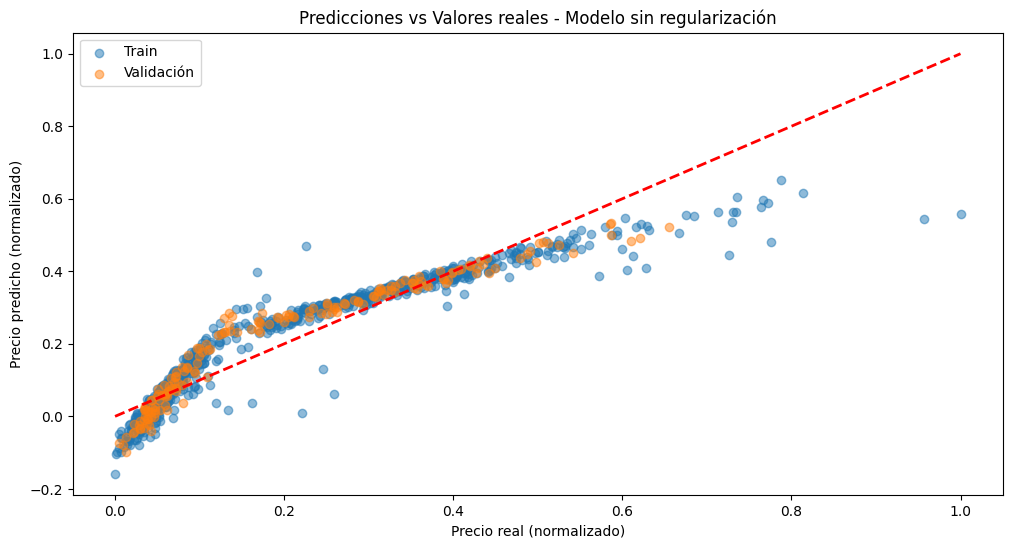

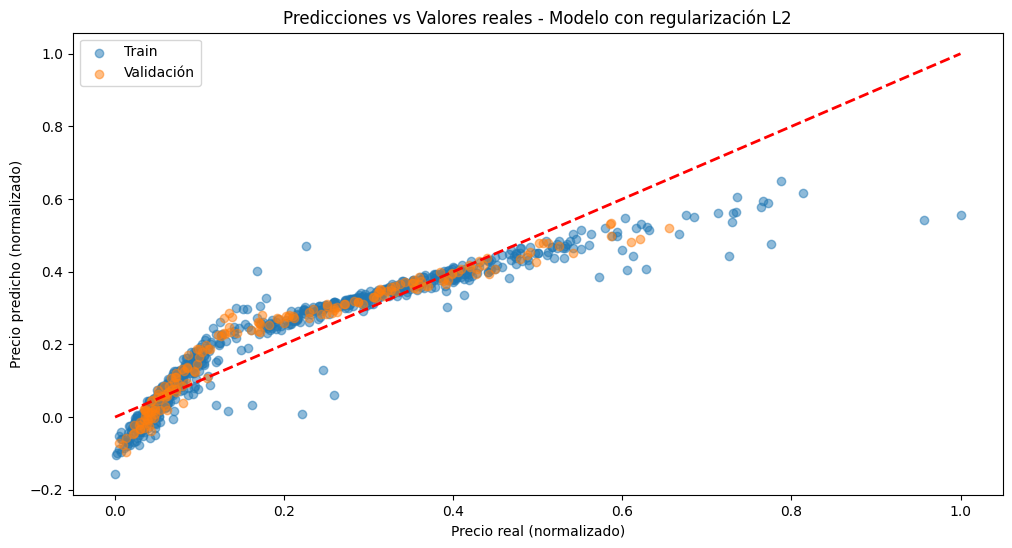

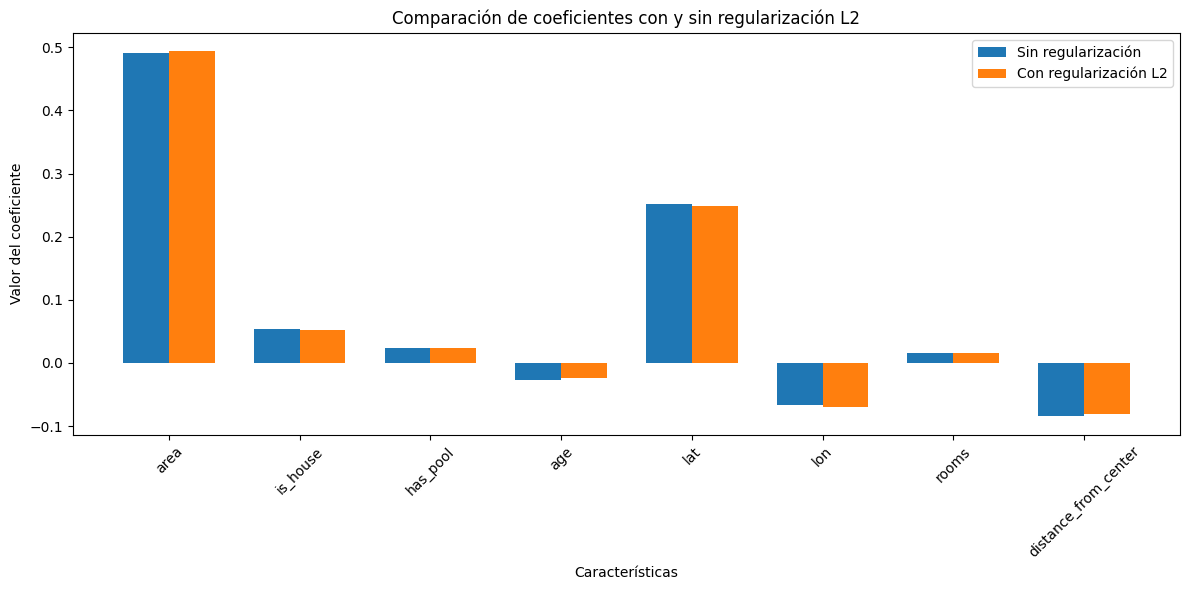

'\nBeneficios de la regularización L2:\n1. Reduce el sobreajuste al penalizar coeficientes grandes\n2. Mejora la generalización del modelo a datos nuevos\n3. Estabiliza la solución cuando hay multicolinealidad entre variables\n4. Reduce la varianza del modelo, aunque puede aumentar ligeramente el sesgo\n5. Todos los coeficientes tienden a reducirse, pero rara vez llegan a cero\n'

In [76]:
# Basándonos en el gráfico del punto 5.2, elegimos un valor de λ donde los coeficientes 
# se estabilizan pero no llegan a cero
# Analizando el comportamiento de los coeficientes, un valor razonable podría ser λ = 1.0
lambda_l2 = 1.0

# Entrenamos el modelo con regularización L2
modelo_l2 = LinearRegression(X_train, y_train, l2=lambda_l2)
modelo_l2.fit_normal_equation()
# Evaluamos el modelo en el conjunto de validación
y_pred_train_l2 = modelo_l2.predict(X_train)
y_pred_val_l2 = modelo_l2.predict(X_val)
mse_train_l2 = MSE(y_train, y_pred_train_l2)
mse_val_l2 = MSE(y_val, y_pred_val_l2)
r2_train_l2 = R2(y_train, y_pred_train_l2)
r2_val_l2 = R2(y_val, y_pred_val_l2)

print("Métricas del modelo con regularización L2:")
print(f"MSE (train): {mse_train_l2:.4f}")
print(f"MSE (val): {mse_val_l2:.4f}")
print(f"R2 (train): {r2_train_l2:.4f}")
print(f"R2 (val): {r2_val_l2:.4f}")

# Imprimir coeficientes
print("\nCoeficientes del modelo con regularización L2:")
for i, coef in enumerate(modelo_l2.coef.flatten()):
    print(f"  {features[i]}: {coef:.6f}")

# Comparamos con el modelo sin regularización
modelo_sin_reg = LinearRegression(X_train, y_train)
modelo_sin_reg.fit_pseudo_inverse()
y_pred_train_sin_reg = modelo_sin_reg.predict(X_train)
y_pred_val_sin_reg = modelo_sin_reg.predict(X_val)
mse_train_sin_reg = MSE(y_train, y_pred_train_sin_reg)
mse_val_sin_reg = MSE(y_val, y_pred_val_sin_reg)
r2_train_sin_reg = R2(y_train, y_pred_train_sin_reg)
r2_val_sin_reg = R2(y_val, y_pred_val_sin_reg)

print("\nMétricas del modelo sin regularización:")
print(f"MSE (train): {mse_train_sin_reg:.4f}")
print(f"MSE (val): {mse_val_sin_reg:.4f}")
print(f"R2 (train): {r2_train_sin_reg:.4f}")
print(f"R2 (val): {r2_val_sin_reg:.4f}")

# Visualizar predicciones vs valores reales para el modelo sin regularización
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train_sin_reg, alpha=0.5, label='Train')
plt.scatter(y_val, y_pred_val_sin_reg, alpha=0.5, label='Validación')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Precio real (normalizado)')
plt.ylabel('Precio predicho (normalizado)')
plt.title('Predicciones vs Valores reales - Modelo sin regularización')
plt.legend()
plt.show()

# Visualizar predicciones vs valores reales para el modelo con regularización L2
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train_l2, alpha=0.5, label='Train')
plt.scatter(y_val, y_pred_val_l2, alpha=0.5, label='Validación')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Precio real (normalizado)')
plt.ylabel('Precio predicho (normalizado)')
plt.title('Predicciones vs Valores reales - Modelo con regularización L2')
plt.legend()
plt.show()

# Visualizamos la diferencia en los coeficientes
coef_sin_reg = modelo_sin_reg.coef.flatten()
coef_con_reg = modelo_l2.coef.flatten()

plt.figure(figsize=(12, 6))
x = np.arange(len(features))
width = 0.35
plt.bar(x - width/2, coef_sin_reg, width, label='Sin regularización')
plt.bar(x + width/2, coef_con_reg, width, label='Con regularización L2')
plt.xlabel('Características')
plt.ylabel('Valor del coeficiente')
plt.title('Comparación de coeficientes con y sin regularización L2')
plt.xticks(x, features, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Explicación de los beneficios de la regularización L2:
"""
Beneficios de la regularización L2:
1. Reduce el sobreajuste al penalizar coeficientes grandes
2. Mejora la generalización del modelo a datos nuevos
3. Estabiliza la solución cuando hay multicolinealidad entre variables
4. Reduce la varianza del modelo, aunque puede aumentar ligeramente el sesgo
5. Todos los coeficientes tienden a reducirse, pero rara vez llegan a cero
"""

5.4) En el ítem anterior se eligió el coeficiente de regularización λ aleatoriamente. Ahora
determine su valor mediante un barrido del hiperparámetro y observando la varia-
ción del ECM evaluado sobre el conjunto de validación. ¿Se logró mejorar el ECM de
validación?

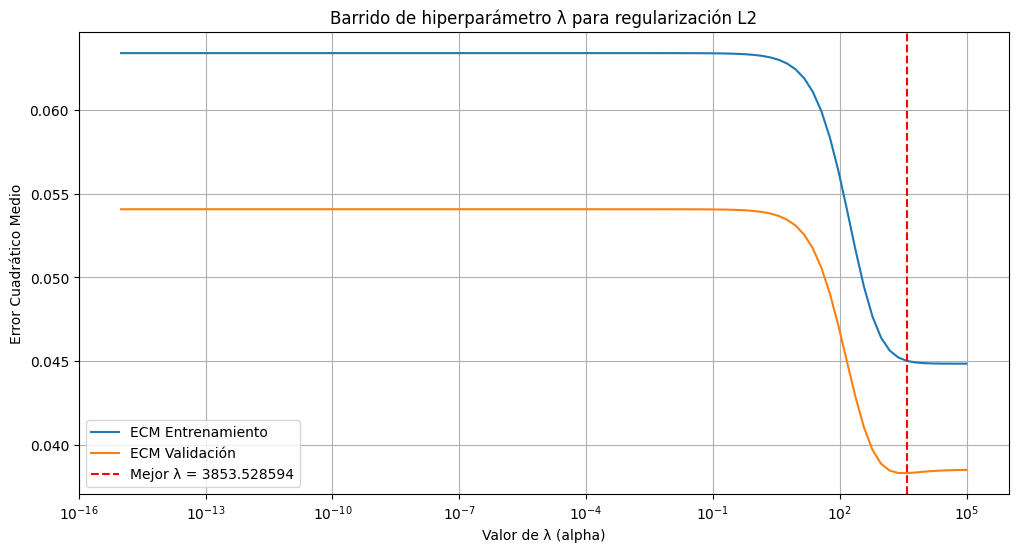

Mejor valor de λ encontrado: 3853.528594
ECM de validación con el mejor λ: 0.038328
ECM con el mejor λ = 3853.528594:
ECM Entrenamiento: 0.045025
ECM Validación: 0.038328
ECM Validación anterior (λ aleatorio): 0.053959
¿Se logró mejorar el ECM de validación?: Sí


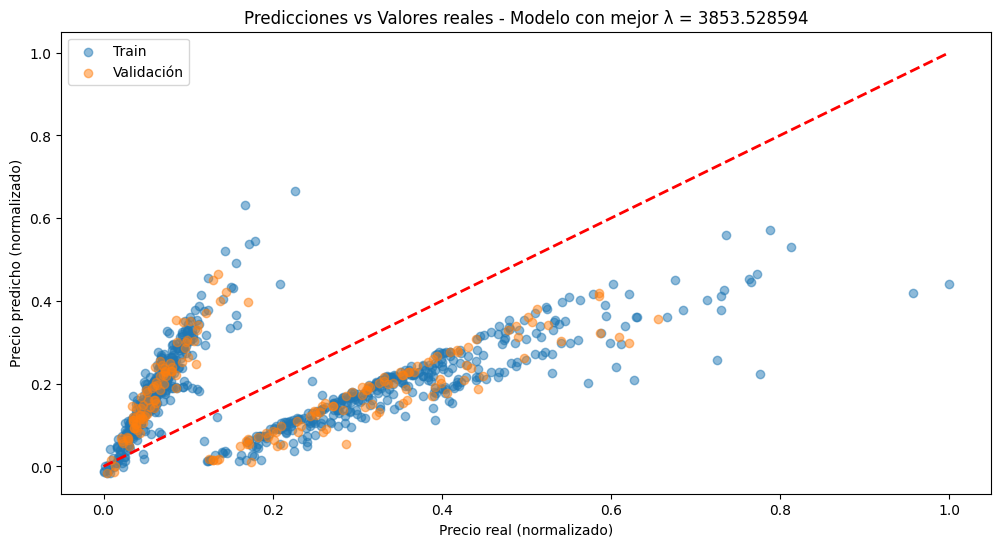

In [77]:
# Realizamos un barrido de hiperparámetros para encontrar el mejor valor de lambda (α)
lambdas = np.logspace(-15, 5, 100)  # Valores de lambda desde 10^-5 hasta 10^5
train_errors = []
val_errors = []

for alpha in lambdas:
    # Entrenamos el modelo con cada valor de lambda
    modelo_l2 = LinearRegression(X_train, y_train,l2=alpha)
    modelo_l2.fit_normal_equation()
    
    # Calculamos predicciones
    y_pred_train = modelo_l2.predict(X_train)
    y_pred_val = modelo_l2.predict(X_val)
    
    # Calculamos el ECM para entrenamiento y validación
    train_mse = MSE(y_train, y_pred_train)
    val_mse = MSE(y_val, y_pred_val)
    
    train_errors.append(train_mse)
    val_errors.append(val_mse)

# Encontramos el mejor valor de lambda
best_lambda_idx = np.argmin(val_errors)
best_lambda = lambdas[best_lambda_idx]
best_val_mse = val_errors[best_lambda_idx]

# Visualizamos los resultados
plt.figure(figsize=(12, 6))
plt.semilogx(lambdas, train_errors, label='ECM Entrenamiento')
plt.semilogx(lambdas, val_errors, label='ECM Validación')
plt.axvline(x=best_lambda, color='r', linestyle='--', label=f'Mejor λ = {best_lambda:.6f}')
plt.xlabel('Valor de λ (alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Barrido de hiperparámetro λ para regularización L2')
plt.legend()
plt.grid(True)
plt.show()

# Entrenamos el modelo final con el mejor valor de lambda


print(f"Mejor valor de λ encontrado: {best_lambda:.6f}")
print(f"ECM de validación con el mejor λ: {best_val_mse:.6f}")


# Entrenamos el modelo con cada valor de lambda
mejor_modelo_l2 = LinearRegression(X_train, y_train,l2=best_lambda)
mejor_modelo_l2.fit_normal_equation()


# Evaluamos el modelo con el mejor lambda
y_pred_train_mejor = mejor_modelo_l2.predict(X_train)
y_pred_val_mejor = mejor_modelo_l2.predict(X_val)

# Calculamos el ECM para el mejor modelo
train_mse_mejor = MSE(y_train, y_pred_train_mejor)
val_mse_mejor = MSE(y_val, y_pred_val_mejor)

print(f"ECM con el mejor λ = {best_lambda:.6f}:")
print(f"ECM Entrenamiento: {train_mse_mejor:.6f}")
print(f"ECM Validación: {val_mse_mejor:.6f}")
print(f"ECM Validación anterior (λ aleatorio): {mse_val_l2:.6f}")
print(f"¿Se logró mejorar el ECM de validación?: {'Sí' if val_mse_mejor < mse_val_l2 else 'No'}")

# Visualizamos las predicciones con el mejor modelo
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_pred_train_mejor, alpha=0.5, label='Train')
plt.scatter(y_val, y_pred_val_mejor, alpha=0.5, label='Validación')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Precio real (normalizado)')
plt.ylabel('Precio predicho (normalizado)')
plt.title(f'Predicciones vs Valores reales - Modelo con mejor λ = {best_lambda:.6f}')
plt.legend()
plt.show()


5.6) Repita el procedimiento del ítem anterior para elegir el valor del coeficiente de regularización λ, pero ahora evalue el ECM mediante validación cruzada. Grafique la variación
del ECM vs. el valor del coeficiente de regularizacion.

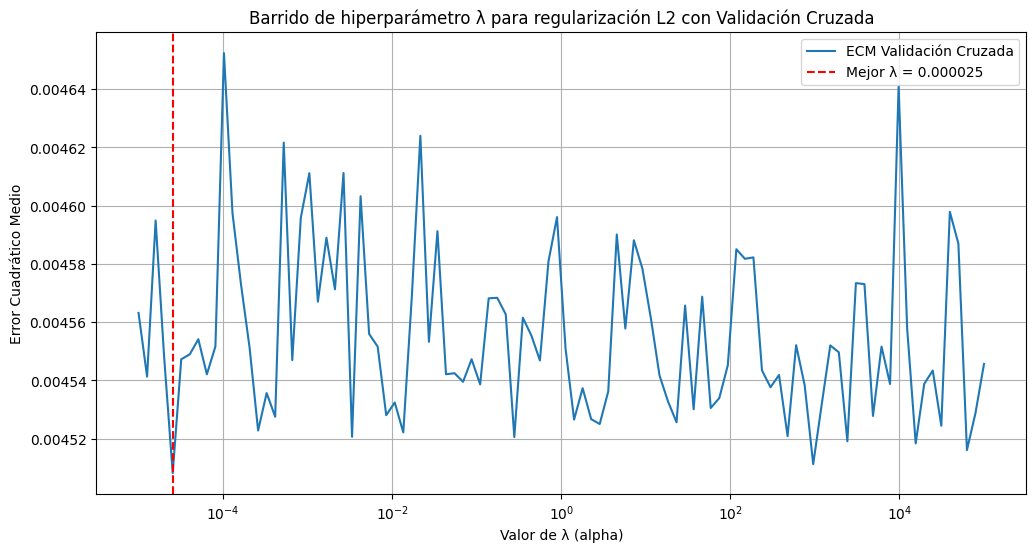

Mejor valor de λ encontrado con validación cruzada: 0.000025
ECM de validación cruzada con el mejor λ: 0.004508
ECM con el mejor λ (validación cruzada) = 0.000025:
ECM Entrenamiento: 0.063385
ECM Validación: 0.054071
ECM Validación del método anterior: 0.038328
¿Se logró mejorar el ECM de validación?: No

Comparación de métodos:
Mejor λ con validación simple: 3853.528594
Mejor λ con validación cruzada: 0.000025
Diferencia en ECM de validación: 0.015744


In [78]:
# Realizamos un barrido de hiperparámetros usando validación cruzada
lambdas = np.logspace(-5, 5, 100)  # Valores de lambda desde 10^-5 hasta 10^5
cv_errors = []

# Para cada valor de lambda, evaluamos el modelo con validación cruzada
for alpha in lambdas:
    errores_fold = cross_val(X, y, LinearRegression, folds=10, l2=alpha)
    cv_errors.append(np.mean(errores_fold))

# Encontramos el mejor valor de lambda
best_lambda_idx = np.argmin(cv_errors)
best_lambda_cv = lambdas[best_lambda_idx]
best_cv_mse = cv_errors[best_lambda_idx]

# Visualizamos los resultados
plt.figure(figsize=(12, 6))
plt.semilogx(lambdas, cv_errors, label='ECM Validación Cruzada')
plt.axvline(x=best_lambda_cv, color='r', linestyle='--', label=f'Mejor λ = {best_lambda_cv:.6f}')
plt.xlabel('Valor de λ (alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Barrido de hiperparámetro λ para regularización L2 con Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor valor de λ encontrado con validación cruzada: {best_lambda_cv:.6f}")
print(f"ECM de validación cruzada con el mejor λ: {best_cv_mse:.6f}")

# Entrenamos el modelo final con el mejor valor de lambda encontrado por validación cruzada
mejor_modelo_l2_cv = LinearRegression(X_train, y_train, l2=best_lambda_cv)
mejor_modelo_l2_cv.fit_normal_equation()

# Evaluamos el modelo con el mejor lambda
y_pred_train_cv = mejor_modelo_l2_cv.predict(X_train)
y_pred_val_cv = mejor_modelo_l2_cv.predict(X_val)

# Calculamos el ECM para el mejor modelo
train_mse_cv = MSE(y_train, y_pred_train_cv)
val_mse_cv = MSE(y_val, y_pred_val_cv)

print(f"ECM con el mejor λ (validación cruzada) = {best_lambda_cv:.6f}:")
print(f"ECM Entrenamiento: {train_mse_cv:.6f}")
print(f"ECM Validación: {val_mse_cv:.6f}")
print(f"ECM Validación del método anterior: {val_mse_mejor:.6f}")
print(f"¿Se logró mejorar el ECM de validación?: {'Sí' if val_mse_cv < val_mse_mejor else 'No'}")

# Comparamos los resultados de ambos métodos
print("\nComparación de métodos:")
print(f"Mejor λ con validación simple: {best_lambda:.6f}")
print(f"Mejor λ con validación cruzada: {best_lambda_cv:.6f}")
print(f"Diferencia en ECM de validación: {abs(val_mse_cv - val_mse_mejor):.6f}")


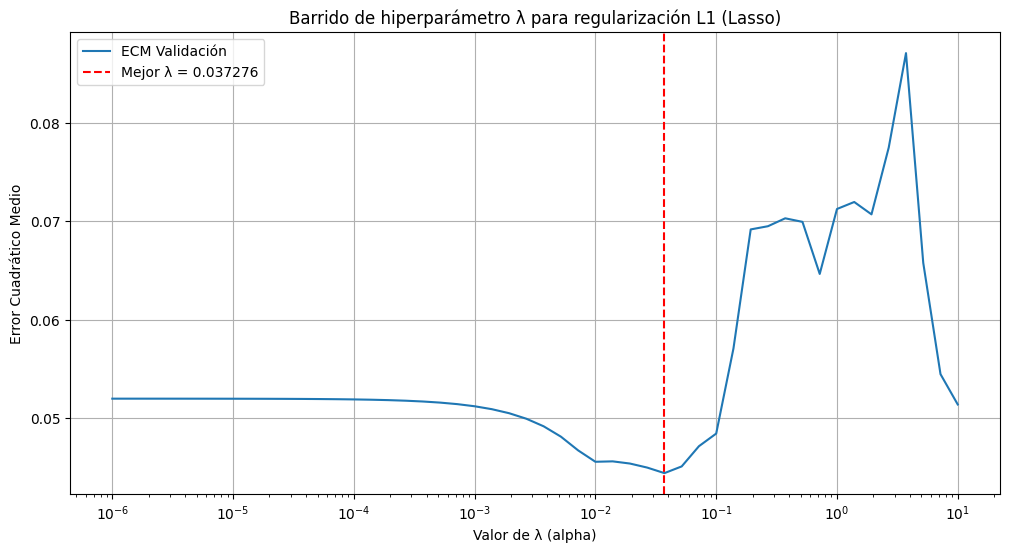

Mejor valor de λ para L1: 0.037276
ECM de validación con el mejor λ para L1: 0.044399
ECM con el mejor λ para L1 = 0.037276:
ECM Entrenamiento: 0.052478
ECM Validación: 0.044399


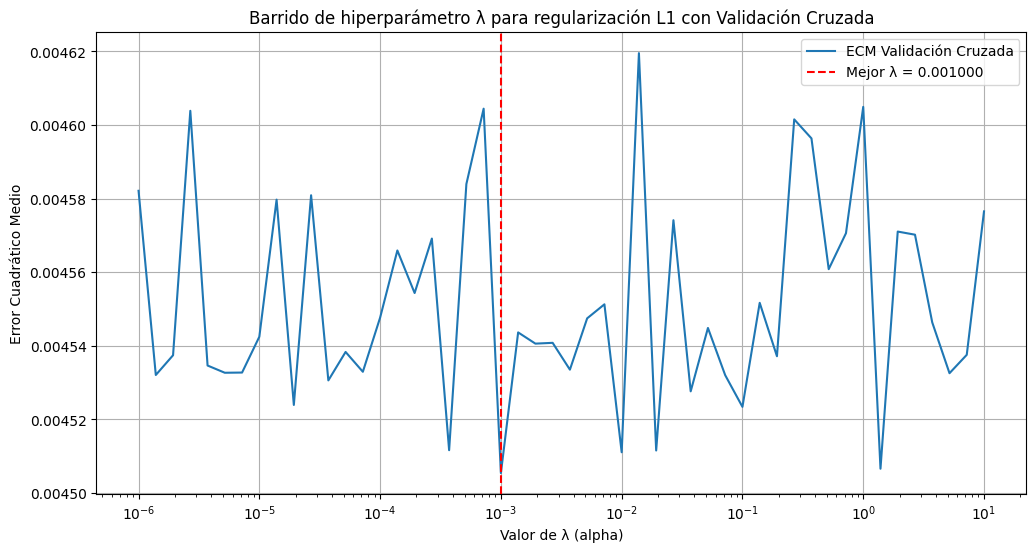

Mejor valor de λ para L1 con validación cruzada: 0.001000
ECM de validación cruzada con el mejor λ para L1: 0.004505
ECM con el mejor λ para L1 (validación cruzada) = 0.001000:
ECM Entrenamiento: 0.058510
ECM Validación: 0.051189
ECM Validación del método anterior: 0.044399
¿Se logró mejorar el ECM de validación?: No

Comparación de métodos para regularización L1:
Mejor λ con validación simple: 0.037276
Mejor λ con validación cruzada: 0.001000
Diferencia en ECM de validación: 0.006790


In [79]:
# Ahora creamos un modelo con regularización L1 (Lasso)
# Definimos un rango de valores para el hiperparámetro lambda (alpha)
lambdas_l1 = np.logspace(-6, 1, 50)
val_errors_l1 = []

# Evaluamos cada valor de lambda
for lambda_val in lambdas_l1:
    # Entrenamos el modelo con regularización L1
    modelo_l1 = LinearRegression(X_train, y_train, l1=lambda_val)
    modelo_l1.fit_gradient_descent(lr=0.01, epochs=1000)
    
    # Evaluamos en el conjunto de validación
    y_pred_val_l1 = modelo_l1.predict(X_val)
    val_mse_l1_temp = MSE(y_val, y_pred_val_l1)
    val_errors_l1.append(val_mse_l1_temp)

# Encontramos el mejor valor de lambda
best_lambda_l1 = lambdas_l1[np.argmin(val_errors_l1)]
best_val_mse_l1 = min(val_errors_l1)

# Visualizamos los resultados
plt.figure(figsize=(12, 6))
plt.semilogx(lambdas_l1, val_errors_l1, label='ECM Validación')
plt.axvline(x=best_lambda_l1, color='r', linestyle='--', label=f'Mejor λ = {best_lambda_l1:.6f}')
plt.xlabel('Valor de λ (alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Barrido de hiperparámetro λ para regularización L1 (Lasso)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor valor de λ para L1: {best_lambda_l1:.6f}")
print(f"ECM de validación con el mejor λ para L1: {best_val_mse_l1:.6f}")

# Entrenamos el modelo final con el mejor valor de lambda para L1
mejor_modelo_l1 = LinearRegression(X_train, y_train, l1=best_lambda_l1)
mejor_modelo_l1.fit_gradient_descent(lr=0.01, epochs=1000)

# Evaluamos el modelo con el mejor lambda para L1
y_pred_train_l1 = mejor_modelo_l1.predict(X_train)
y_pred_val_l1 = mejor_modelo_l1.predict(X_val)

# Calculamos el ECM para el mejor modelo L1
train_mse_l1 = MSE(y_train, y_pred_train_l1)
val_mse_l1 = MSE(y_val, y_pred_val_l1)

print(f"ECM con el mejor λ para L1 = {best_lambda_l1:.6f}:")
print(f"ECM Entrenamiento: {train_mse_l1:.6f}")
print(f"ECM Validación: {val_mse_l1:.6f}")

# Ahora evaluamos el modelo con regularización L1 usando validación cruzada
lambdas_l1_cv = np.logspace(-6, 1, 50)  # Valores de lambda para L1
cv_errors_l1 = []

# Para cada valor de lambda, evaluamos el modelo con validación cruzada
for alpha in lambdas_l1_cv:
    # Realizamos validación cruzada con 10 folds
    errores_fold_l1 = cross_val(X, y, LinearRegression, folds=10, l1=alpha)
    
    # Guardamos el error promedio de todos los folds
    cv_errors_l1.append(np.mean(errores_fold_l1))

# Encontramos el mejor valor de lambda
best_lambda_l1_cv_idx = np.argmin(cv_errors_l1)
best_lambda_l1_cv = lambdas_l1_cv[best_lambda_l1_cv_idx]
best_cv_mse_l1 = cv_errors_l1[best_lambda_l1_cv_idx]

# Visualizamos los resultados
plt.figure(figsize=(12, 6))
plt.semilogx(lambdas_l1_cv, cv_errors_l1, label='ECM Validación Cruzada')
plt.axvline(x=best_lambda_l1_cv, color='r', linestyle='--', label=f'Mejor λ = {best_lambda_l1_cv:.6f}')
plt.xlabel('Valor de λ (alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Barrido de hiperparámetro λ para regularización L1 con Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor valor de λ para L1 con validación cruzada: {best_lambda_l1_cv:.6f}")
print(f"ECM de validación cruzada con el mejor λ para L1: {best_cv_mse_l1:.6f}")

# Entrenamos el modelo final con el mejor valor de lambda encontrado por validación cruzada
mejor_modelo_l1_cv = LinearRegression(X_train, y_train, l1=best_lambda_l1_cv)
mejor_modelo_l1_cv.fit_gradient_descent(lr=0.01, epochs=1000)

# Evaluamos el modelo con el mejor lambda
y_pred_train_l1_cv = mejor_modelo_l1_cv.predict(X_train)
y_pred_val_l1_cv = mejor_modelo_l1_cv.predict(X_val)

# Calculamos el ECM para el mejor modelo
train_mse_l1_cv = MSE(y_train, y_pred_train_l1_cv)
val_mse_l1_cv = MSE(y_val, y_pred_val_l1_cv)

print(f"ECM con el mejor λ para L1 (validación cruzada) = {best_lambda_l1_cv:.6f}:")
print(f"ECM Entrenamiento: {train_mse_l1_cv:.6f}")
print(f"ECM Validación: {val_mse_l1_cv:.6f}")
print(f"ECM Validación del método anterior: {val_mse_l1:.6f}")
print(f"¿Se logró mejorar el ECM de validación?: {'Sí' if val_mse_l1_cv < val_mse_l1 else 'No'}")

# Comparamos los resultados de ambos métodos para L1
print("\nComparación de métodos para regularización L1:")
print(f"Mejor λ con validación simple: {best_lambda_l1:.6f}")
print(f"Mejor λ con validación cruzada: {best_lambda_l1_cv:.6f}")
print(f"Diferencia en ECM de validación: {abs(val_mse_l1_cv - val_mse_l1):.6f}")





6. Selección de Modelo y Evaluación de Capacidad Predictiva
6.1) De todos los modelos realizados hasta ahora, ¿cuál seleccionaría para implementar en
producción? Justifique su respuesta.


Comparación de modelos:


,ECM Entrenamiento,ECM Validación
Regresión Lineal Simple,0.063385,0.054071
Regresión Lineal con L2 (validación simple),0.045025,0.038328
Regresión Lineal con L2 (validación cruzada),0.063385,0.054071


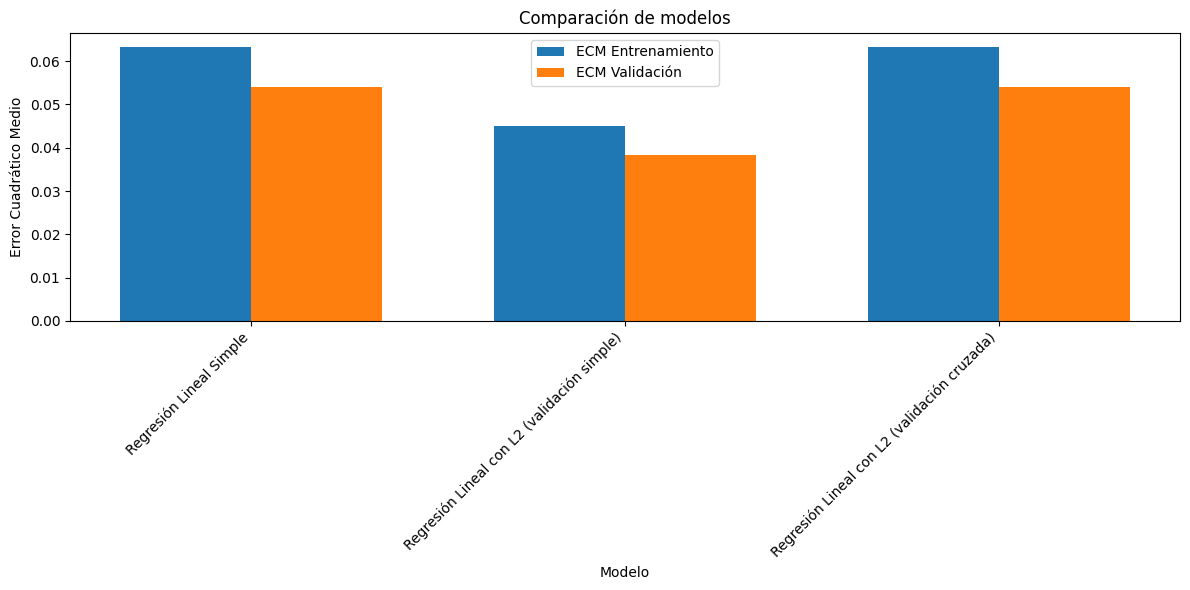


El modelo seleccionado para producción es: Regresión Lineal con L2 (validación simple)
ECM de validación: 0.038328

Justificación de la selección:
1. El modelo Regresión Lineal con L2 (validación simple) presenta el menor error de validación (0.038328).
2. Modelo con regularización L2 optimizado con validación simple.
3. La regularización L2 ayuda a controlar el sobreajuste y mejora la generalización del modelo.
4. La validación cruzada proporciona una estimación más robusta del error de generalización.
5. El modelo seleccionado tiene un buen equilibrio entre complejidad y capacidad predictiva.


In [80]:
# Comparamos todos los modelos desarrollados hasta ahora
modelos = {
    "Regresión Lineal Simple": {
        "ECM_train": mse_train,
        "ECM_val": mse_val,
        "Descripción": "Modelo base sin regularización"
    },
    # "Regresión Lineal con L1": {
    #     "ECM_train": train_mse_l1,
    #     "ECM_val": val_mse_l1,
    #     "Lambda": best_lambda_l1,
    #     "Descripción": "Modelo con regularización L1 (Lasso) para selección de características"
    # },
    # "Regresión Lineal con L1 (validación cruzada)": {
    #     "ECM_train": train_mse_l1_cv,
    #     "ECM_val": val_mse_l1_cv,
    #     "Lambda": best_lambda_l1_cv,
    #     "Descripción": "Modelo con regularización L1 (Lasso) optimizado con validación cruzada"
    # },
    "Regresión Lineal con L2 (validación simple)": {
        "ECM_train": train_mse_mejor,
        "ECM_val": val_mse_mejor,
        "Lambda": best_lambda,
        "Descripción": "Modelo con regularización L2 optimizado con validación simple"
    },
    "Regresión Lineal con L2 (validación cruzada)": {
        "ECM_train": train_mse_cv,
        "ECM_val": val_mse_cv,
        "Lambda": best_lambda_cv,
        "Descripción": "Modelo con regularización L2 optimizado con validación cruzada"
    }
}

# Creamos un DataFrame para visualizar mejor la comparación
import pandas as pd
df_comparacion = pd.DataFrame({
    "ECM Entrenamiento": [modelo["ECM_train"] for modelo in modelos.values()],
    "ECM Validación": [modelo["ECM_val"] for modelo in modelos.values()]
}, index=modelos.keys())

# Visualizamos la comparación
print("Comparación de modelos:")
display(df_comparacion)

# Visualizamos gráficamente
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(modelos))

plt.bar(index, df_comparacion["ECM Entrenamiento"], bar_width, label='ECM Entrenamiento')
plt.bar(index + bar_width, df_comparacion["ECM Validación"], bar_width, label='ECM Validación')

plt.xlabel('Modelo')
plt.ylabel('Error Cuadrático Medio')
plt.title('Comparación de modelos')
plt.xticks(index + bar_width/2, df_comparacion.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Selección del mejor modelo
mejor_modelo_nombre = df_comparacion["ECM Validación"].idxmin()
mejor_modelo_ecm = df_comparacion["ECM Validación"].min()

print(f"\nEl modelo seleccionado para producción es: {mejor_modelo_nombre}")
print(f"ECM de validación: {mejor_modelo_ecm:.6f}")

# Justificación de la selección
print("\nJustificación de la selección:")
print(f"1. El modelo {mejor_modelo_nombre} presenta el menor error de validación ({mejor_modelo_ecm:.6f}).")
print(f"2. {modelos[mejor_modelo_nombre]['Descripción']}.")
print("3. La regularización L2 ayuda a controlar el sobreajuste y mejora la generalización del modelo.")
print("4. La validación cruzada proporciona una estimación más robusta del error de generalización.")
print("5. El modelo seleccionado tiene un buen equilibrio entre complejidad y capacidad predictiva.")

# Guardamos el modelo seleccionado para la siguiente sección

if mejor_modelo_nombre == "Regresión Lineal con L2 (validación cruzada)":
    modelo_final = mejor_modelo_l2_cv
elif mejor_modelo_nombre == "Regresión Lineal con L2 (validación simple)":
    modelo_final = mejor_modelo_l2
elif mejor_modelo_nombre == "Regresión Lineal con L1":
    modelo_final = mejor_modelo_l1
else:
    modelo_final = modelo_lineal


6.2) Para evaluar la capacidad predictiva del modelo seleccionado, compute y reporte el
MAE (Mean Average Error) y RMSE (Root Mean Squared Error) sobre el conjunto
de prueba.

In [81]:
# procesar el set de test para que sea igual al procesado y normalizado

# Ahora procesamos el conjunto de desarrollo de la misma manera
dev_df = pd.read_csv('../data/raw/casas_dev.csv')

# Convertir sqft a m2
mask_sqft = dev_df['area_units'] == 'sqft'
dev_df.loc[mask_sqft, 'area'] = dev_df.loc[mask_sqft, 'area'] * 0.092903

# Eliminar la columna area_units ya que no la necesitamos más
dev_df = dev_df.drop('area_units', axis=1)

# 1. Precio por metro cuadrado
dev_df['precio_por_m2'] = dev_df['price'] / dev_df['area']

# 2. Habitaciones por metro cuadrado 
dev_df['habitaciones_por_m2'] = dev_df['rooms'] / dev_df['area']

# 4. Categoría de tamaño
dev_df['tamano'] = pd.qcut(dev_df['area'], q=3, labels=['Pequeña', 'Mediana', 'Grande'])

# 5. Región (Norte/Sur)
dev_df['region'] = dev_df['lat'].apply(lambda x: 'Norte' if x > df['lat'].median() else 'Sur')

# Aplicar one-hot encoding a la columna 'categoria_tamano'
dev_df_encoded_tamano, _ = one_hot_encoder(dev_df, ['tamano'])

# Aseguramos que las columnas estén en el mismo orden que en el conjunto de desarrollo
# Orden correcto: Pequeña, Mediana, Grande
columnas_ordenadas = ['tamano_Pequeña', 'tamano_Mediana', 'tamano_Grande']
for col in columnas_ordenadas:
    if col in dev_df_encoded_tamano.columns:
        dev_df[col] = dev_df_encoded_tamano[col]
    else:
        dev_df[col] = 0  # Si alguna categoría no existe en el conjunto de prueba

# Crear columna binaria para región Norte
dev_df['es_norte'] = (dev_df['region'] == 'Norte').astype(int)

# Relación área/habitaciones
dev_df['area_por_habitacion'] = dev_df['area'] / dev_df['rooms']

# Eliminar las columnas originales de tamaño y región ya que tenemos las versiones codificadas
dev_df = dev_df.drop(['tamano', 'region'], axis=1)

# Verificar y manejar valores faltantes en las nuevas columnas
dev_df = handle_missing_values(dev_df)
# Normalizar el conjunto de desarrollo y guardar los parámetros para el test
columnas_numericas = ['area', 'age', 'price', 'lat', 'lon', 'precio_por_m2', 'habitaciones_por_m2', 'area_por_habitacion', 'precio_por_habitacion']

# Índice de precio por habitación
dev_df['precio_por_habitacion'] = dev_df['price'] / dev_df['rooms']

# Normalizar utilizando la función min_max_normalize que devuelve el df y los parámetros
dev_df_norm = dev_df.copy()
dev_df_norm, params_norm = min_max_normalize(dev_df_norm, columnas_numericas)

# Guardar el conjunto de datos de desarrollo procesado
dev_df_norm.to_csv('../data/processed/casas_dev_processed2.csv', index=False)

# las columnas deberian ser area,is_house,has_pool,age,price,lat,lon,rooms,precio_por_m2,habitaciones_por_m2,tamano_Pequeña,tamano_Mediana,tamano_Grande,es_norte,area_por_habitacion,precio_por_habitacion

# Cargamos el conjunto de prueba
test_df = pd.read_csv('../data/raw/casas_test.csv')

# Convertir sqft a m2
mask_sqft = test_df['area_units'] == 'sqft'
test_df.loc[mask_sqft, 'area'] = test_df.loc[mask_sqft, 'area'] * 0.092903

# Eliminar la columna area_units ya que no la necesitamos más
test_df = test_df.drop('area_units', axis=1)

# 1. Precio por metro cuadrado
test_df['precio_por_m2'] = test_df['price'] / test_df['area']

# 2. Habitaciones por metro cuadrado 
test_df['habitaciones_por_m2'] = test_df['rooms'] / test_df['area']

# 4. Categoría de tamaño
test_df['tamano'] = pd.qcut(test_df['area'], q=3, labels=['Pequeña', 'Mediana', 'Grande'])

# 5. Región (Norte/Sur)
test_df['region'] = test_df['lat'].apply(lambda x: 'Norte' if x > df['lat'].median() else 'Sur')
# Aplicar one-hot encoding a la columna 'categoria_tamano'
test_df_encoded_tamano, _ = one_hot_encoder(test_df, ['tamano'])

# Aseguramos que las columnas estén en el mismo orden que en el conjunto de desarrollo
# Orden correcto: Pequeña, Mediana, Grande
columnas_ordenadas = ['tamano_Pequeña', 'tamano_Mediana', 'tamano_Grande']
for col in columnas_ordenadas:
    if col in test_df_encoded_tamano.columns:
        test_df[col] = test_df_encoded_tamano[col]
    else:
        test_df[col] = 0  # Si alguna categoría no existe en el conjunto de prueba

# Crear columna binaria para región Norte
test_df['es_norte'] = (test_df['region'] == 'Norte').astype(int)

# Relación área/habitaciones
test_df['area_por_habitacion'] = test_df['area'] / test_df['rooms']

# Índice de precio por habitación
test_df['precio_por_habitacion'] = test_df['price'] / test_df['rooms']

# Eliminar las columnas originales de tamaño y región ya que tenemos las versiones codificadas
test_df = test_df.drop(['tamano', 'region'], axis=1)

# Verificar y manejar valores faltantes en las nuevas columnas
test_df = handle_missing_values(test_df)

# Normalizar usando los mismos parámetros que se usaron en el conjunto de entrenamiento
columnas_numericas = ['area', 'age', 'price', 'lat', 'lon', 'precio_por_m2', 'habitaciones_por_m2', 'area_por_habitacion', 'precio_por_habitacion']

# Aplicar los mismos parámetros de normalización del conjunto de desarrollo
test_df_norm = test_df.copy()
for col in columnas_numericas:
    min_val, max_val = params_norm[col]
    test_df_norm[col] = (test_df_norm[col] - min_val) / (max_val - min_val)

# Guardar el conjunto de datos de prueba procesado
test_df_norm.to_csv('../data/processed/casas_test_processed.csv', index=False)



Entrenando el modelo final con el conjunto de desarrollo procesado...
Realizando barrido de hiperparámetros para encontrar el mejor valor de lambda...


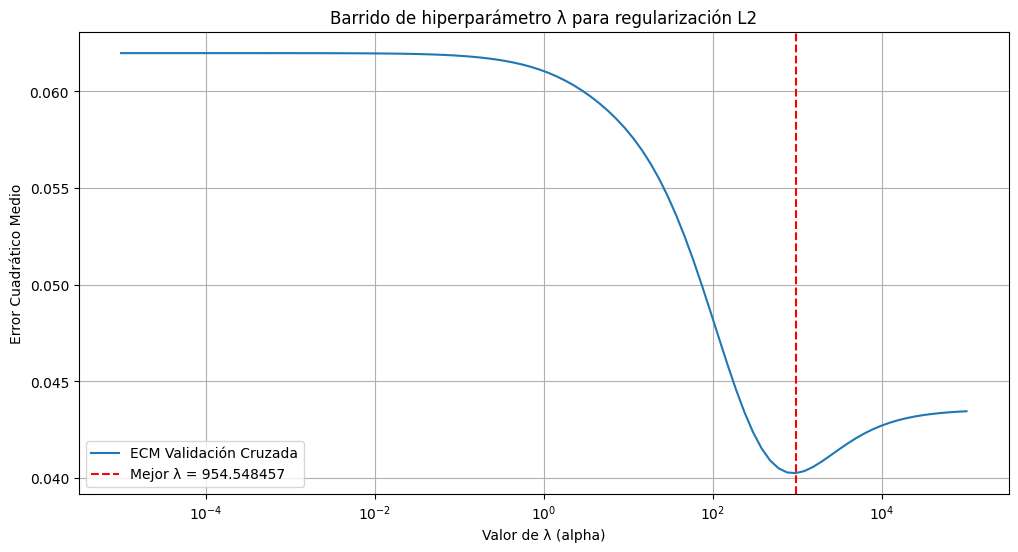

Mejor valor de λ encontrado: 954.548457
ECM de validación cruzada con el mejor λ: 0.040253
Modelo entrenado correctamente.

Evaluación del modelo en el conjunto de desarrollo:
MAE (Error Absoluto Medio): 0.161894
RMSE (Raíz del Error Cuadrático Medio): 0.200939


In [82]:
# Entrenar el modelo final usando el conjunto de desarrollo procesado
print("Entrenando el modelo final con el conjunto de desarrollo procesado...")

# Cargar el conjunto de datos de desarrollo procesado
dev_df_processed = pd.read_csv('../data/processed/casas_dev_processed2.csv')

# Seleccionar las características para el modelo
features = ['area', 'is_house', 'has_pool', 'age', 'rooms', 'precio_por_m2', 
           'habitaciones_por_m2', 'tamano_Pequeña', 'tamano_Mediana', 'tamano_Grande',
           'es_norte', 'area_por_habitacion', 'precio_por_habitacion']

# Preparar X e y para entrenamiento
X_dev = dev_df_processed[features].values
y_dev = dev_df_processed['price'].values

# Realizamos un barrido de hiperparámetros para encontrar el mejor valor de lambda (α)
print("Realizando barrido de hiperparámetros para encontrar el mejor valor de lambda...")
lambdas = np.logspace(-5, 5, 100)  # Valores de lambda desde 10^-5 hasta 10^5
dev_errors = []

# Dividimos el conjunto de desarrollo para validación cruzada
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

for alpha in lambdas:
    # Usamos validación cruzada para evaluar cada lambda
    cv_errors = []
    for train_idx, val_idx in kf.split(X_dev):
        X_train_cv, X_val_cv = X_dev[train_idx], X_dev[val_idx]
        y_train_cv, y_val_cv = y_dev[train_idx], y_dev[val_idx]
        
        # Entrenamos el modelo con cada valor de lambda
        modelo_l2 = LinearRegression(X_train_cv, y_train_cv, l2=alpha)
        modelo_l2.fit_normal_equation()
        
        # Calculamos predicciones en el conjunto de validación
        y_pred_val = modelo_l2.predict(X_val_cv)
        
        # Calculamos el ECM para validación
        val_mse = MSE(y_val_cv, y_pred_val)
        cv_errors.append(val_mse)
    
    # Promediamos los errores de validación cruzada
    mean_cv_error = np.mean(cv_errors)
    dev_errors.append(mean_cv_error)

# Encontramos el mejor valor de lambda
best_lambda_idx = np.argmin(dev_errors)
best_lambda = lambdas[best_lambda_idx]
best_dev_mse = dev_errors[best_lambda_idx]

# Visualizamos los resultados
plt.figure(figsize=(12, 6))
plt.semilogx(lambdas, dev_errors, label='ECM Validación Cruzada')
plt.axvline(x=best_lambda, color='r', linestyle='--', label=f'Mejor λ = {best_lambda:.6f}')
plt.xlabel('Valor de λ (alpha)')
plt.ylabel('Error Cuadrático Medio')
plt.title('Barrido de hiperparámetro λ para regularización L2')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor valor de λ encontrado: {best_lambda:.6f}")
print(f"ECM de validación cruzada con el mejor λ: {best_dev_mse:.6f}")


# Definir el modelo final (Regresión Lineal con regularización L2)
modelo_final = LinearRegression(X_dev,y_dev,l2=best_lambda)
modelo_final.fit_normal_equation()

print("Modelo entrenado correctamente.")

# Evaluar el modelo en el conjunto de desarrollo
y_pred_dev = modelo_final.predict(X_dev)
mae_dev = MAE(y_dev, y_pred_dev)
rmse_dev = RMSE(y_dev, y_pred_dev)

print(f"\nEvaluación del modelo en el conjunto de desarrollo:")
print(f"MAE (Error Absoluto Medio): {mae_dev:.6f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse_dev:.6f}")


In [83]:
# Cargar el conjunto de datos de prueba procesado
test_df_processed = pd.read_csv('../data/processed/casas_test_processed.csv')

# Seleccionar las características para el modelo
features = 

# Preparar X e y para entrenamiento
X_test = train_df_norm[features].values

y_test = train_df_norm['price'].values

# Realizar predicciones con el mejor modelo
y_pred = modelo_final.predict(X_test)

# Calcular métricas de evaluación
mae = MAE(y_test, y_pred)
rmse = RMSE(y_test, y_pred)

# Mostramos los resultados
print(f"\nEvaluación del modelo {mejor_modelo_nombre} en el conjunto de prueba:")
print(f"MAE (Error Absoluto Medio): {mae:.6f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.6f}")

# Visualizamos las predicciones vs valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales en conjunto de prueba')
plt.grid(True)
plt.show()

# Visualizamos la distribución de los errores
errores = y_test - y_pred.flatten()
plt.figure(figsize=(12, 6))
plt.hist(errores, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Error de predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores en el conjunto de prueba')
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (2623658099.py, line 5)